<a href="https://colab.research.google.com/github/generacionmovil/ocupacion/blob/main/PROYECTO_GENERACION_MOVIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paquetes

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 12.7MB/s 
     |████████████████████████████████| 9.5MB 40.6MB/s 
     |████████████████████████████████| 2.1MB 40.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
import logging
import numpy as np

In [ ]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For Arima
import pmdarima
import statsmodels.tsa.api as smt
## For Lstm
from tensorflow.keras import models, layers, preprocessing as kprocessing
## For Prophet
from fbprophet import Prophet

#Tratamiento base de datos





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dtf = pd.read_csv("/content/drive/My Drive/colab bases/Base de datos Nov 2018_a_Nov_18_2020.csv", encoding='latin1', delimiter=';')
dtf.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.



,ID,Codigo Zona,Operador ingreso,Placa,Tipo vehículo,Tipo de ingreso,Nº de personal,Posición de la celda,Identificación,Nombre de usuario,Oficina,Fecha hora ingreso,Fecha ingreso,Hora ingreso,Operador factura,Tipo de cobro,Tipo de pago,Tarifa,Valor,Num. Factura,Fecha factura,Operador salida,Fecha hora salida,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Num. Factura TR,Total Tiempo
459812,2324322,PARQUE CALDAS,JULIANA ANDREA RODRIGUEZ SANCHEZ,IHF45F,Motos,Normal,0,NaN,NaN,NaN,NaN,2020-11-03 08:38:04,03-11-2020,08:38:04,juliana lopera,Tiquete pago,Normal,MOTOS ZER CALDAS,6250,NaN,2020-11-03 14:39:34,juliana lopera,2020-11-03 14:39:34,03-11-2020,14:39:34,,NaN,NaN,06:01:30
459813,2324325,PARQUE CALDAS,JULIANA ANDREA RODRIGUEZ SANCHEZ,AAC45B,Motos,Normal,0,NaN,NaN,NaN,NaN,2020-11-03 08:37:41,03-11-2020,08:37:41,JULIANA ANDREA RODRIGUEZ SANCHEZ,Tiquete pago,Normal,MOTOS ZER CALDAS,1250,NaN,2020-11-03 09:39:13,JULIANA ANDREA RODRIGUEZ SANCHEZ,2020-11-03 09:39:13,03-11-2020,09:39:13,,NaN,NaN,01:01:32
459814,2324324,PARQUE CALDAS,JULIANA ANDREA RODRIGUEZ SANCHEZ,BQN71F,Motos,Normal,0,NaN,NaN,NaN,NaN,2020-11-03 08:37:18,03-11-2020,08:37:18,JULIANA ANDREA RODRIGUEZ SANCHEZ,Tiquete pago,Normal,MOTOS ZER CALDAS,500,NaN,2020-11-03 09:02:34,JULIANA ANDREA RODRIGUEZ SANCHEZ,2020-11-03 09:02:34,03-11-2020,09:02:34,,NaN,NaN,00:25:16
459815,2324323,PARQUE CALDAS,JULIANA ANDREA RODRIGUEZ SANCHEZ,PKQ10D,Motos,Normal,0,NaN,NaN,NaN,NaN,2020-11-03 08:36:49,03-11-2020,08:36:49,JULIANA ANDREA RODRIGUEZ SANCHEZ,Tiquete pago,Normal,MOTOS ZER CALDAS,1000,NaN,2020-11-03 09:27:50,JULIANA ANDREA RODRIGUEZ SANCHEZ,2020-11-03 09:27:50,03-11-2020,09:27:50,,NaN,NaN,00:51:01
459816,2334478,PARQUE CALDAS,JULIANA ANDREA RODRIGUEZ SANCHEZ,ATF06D,Motos,Normal,0,NaN,NaN,NaN,NaN,2020-11-03 08:36:27,03-11-2020,08:36:27,JULIANA ANDREA RODRIGUEZ SANCHEZ,Cartera Recuperada,Tiquete no pago,MOTOS ZER CALDAS,1500,NaN,2020-11-03 09:57:51,JULIANA ANDREA RODRIGUEZ SANCHEZ,2020-11-03 09:57:51,03-11-2020,09:57:51,EDY YONIVER RUIZ GARCIA,2020-11-04 09:45:35,NaN,01:21:24


In [ ]:
print(list(dtf.columns))

['ID', 'Codigo Zona', 'Operador ingreso', 'Placa', 'Tipo vehículo', 'Tipo de ingreso', 'Nº de personal', 'Posición de la celda', 'Identificación', 'Nombre de usuario', 'Oficina', 'Fecha hora ingreso', 'Fecha ingreso', 'Hora ingreso', 'Operador factura', 'Tipo de cobro', 'Tipo de pago', 'Tarifa', 'Valor', 'Num. Factura', 'Fecha factura', 'Operador salida', 'Fecha hora salida', 'Fecha salida', 'Hora salida', 'Impulsador TR', 'Fecha TR', 'Num. Factura TR', 'Total Tiempo']


In [ ]:
##Escoger zona a filtrar
dtf=dtf[dtf['Codigo Zona']=='FULLHOGAR']
dtf.head()

,ID,Codigo Zona,Operador ingreso,Placa,Tipo vehículo,Tipo de ingreso,Nº de personal,Posición de la celda,Identificación,Nombre de usuario,Oficina,Fecha hora ingreso,Fecha ingreso,Hora ingreso,Operador factura,Tipo de cobro,Tipo de pago,Tarifa,Valor,Num. Factura,Fecha factura,Operador salida,Fecha hora salida,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Num. Factura TR,Total Tiempo
12,9231398,FULLHOGAR,DANILO A TANGARIFE,CPO38,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:45:25,29-11-2018,17:45:25,DANILO A TANGARIFE,Tiquete pago,Normal,MOTOS ZER CALDAS,500,Z1 1134,2018-11-29 18:07:58,DANILO A TANGARIFE,2018-11-29 18:07:58,29-11-2018,18:07:58,,NaN,NaN,00:22:33
14,9231397,FULLHOGAR,DANILO A TANGARIFE,XLC69E,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:44:57,29-11-2018,17:44:57,DANILO A TANGARIFE,Tiquete pago,Normal,MOTOS ZER CALDAS,1000,Z1 1138,2018-11-29 18:35:55,DANILO A TANGARIFE,2018-11-29 18:35:55,29-11-2018,18:35:55,,NaN,NaN,00:50:58
19,9231620,FULLHOGAR,DANILO A TANGARIFE,ISU98B,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:41:50,29-11-2018,17:41:50,DANILO A TANGARIFE,Cartera Recuperada,Tiquete no pago,MOTOS ZER CALDAS,1000,,2018-11-29 18:37:12,DANILO A TANGARIFE,2018-11-29 18:37:12,29-11-2018,18:37:12,DANILO A TANGARIFE,2018-11-29 18:41:31,NaN,00:55:22
24,9231394,FULLHOGAR,DANILO A TANGARIFE,EWT20B,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:36:55,29-11-2018,17:36:55,DANILO A TANGARIFE,Tiquete pago,Normal,MOTOS ZER CALDAS,750,Z1 1135,2018-11-29 18:10:33,DANILO A TANGARIFE,2018-11-29 18:10:33,29-11-2018,18:10:33,,NaN,NaN,00:33:38
27,9231392,FULLHOGAR,DANILO A TANGARIFE,BXD91E,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:33:24,29-11-2018,17:33:24,DANILO A TANGARIFE,Tiquete pago,Normal,MOTOS ZER CALDAS,750,Z1 1133,2018-11-29 18:05:12,DANILO A TANGARIFE,2018-11-29 18:05:12,29-11-2018,18:05:12,,NaN,NaN,00:31:48


In [ ]:
##Escoger tipo de vehiculo
dtf=dtf[dtf['Tipo vehículo']=='Motos']
dtf.head()

,ID,Codigo Zona,Operador ingreso,Placa,Tipo vehículo,Tipo de ingreso,Nº de personal,Posición de la celda,Identificación,Nombre de usuario,Oficina,Fecha hora ingreso,Fecha ingreso,Hora ingreso,Operador factura,Tipo de cobro,Tipo de pago,Tarifa,Valor,Num. Factura,Fecha factura,Operador salida,Fecha hora salida,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Num. Factura TR,Total Tiempo
12,9231398,FULLHOGAR,DANILO A TANGARIFE,CPO38,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:45:25,29-11-2018,17:45:25,DANILO A TANGARIFE,Tiquete pago,Normal,MOTOS ZER CALDAS,500,Z1 1134,2018-11-29 18:07:58,DANILO A TANGARIFE,2018-11-29 18:07:58,29-11-2018,18:07:58,,NaN,NaN,00:22:33
14,9231397,FULLHOGAR,DANILO A TANGARIFE,XLC69E,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:44:57,29-11-2018,17:44:57,DANILO A TANGARIFE,Tiquete pago,Normal,MOTOS ZER CALDAS,1000,Z1 1138,2018-11-29 18:35:55,DANILO A TANGARIFE,2018-11-29 18:35:55,29-11-2018,18:35:55,,NaN,NaN,00:50:58
19,9231620,FULLHOGAR,DANILO A TANGARIFE,ISU98B,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:41:50,29-11-2018,17:41:50,DANILO A TANGARIFE,Cartera Recuperada,Tiquete no pago,MOTOS ZER CALDAS,1000,,2018-11-29 18:37:12,DANILO A TANGARIFE,2018-11-29 18:37:12,29-11-2018,18:37:12,DANILO A TANGARIFE,2018-11-29 18:41:31,NaN,00:55:22
24,9231394,FULLHOGAR,DANILO A TANGARIFE,EWT20B,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:36:55,29-11-2018,17:36:55,DANILO A TANGARIFE,Tiquete pago,Normal,MOTOS ZER CALDAS,750,Z1 1135,2018-11-29 18:10:33,DANILO A TANGARIFE,2018-11-29 18:10:33,29-11-2018,18:10:33,,NaN,NaN,00:33:38
27,9231392,FULLHOGAR,DANILO A TANGARIFE,BXD91E,Motos,Pago al ingreso,0,0.0,NaN,NaN,NaN,2018-11-29 17:33:24,29-11-2018,17:33:24,DANILO A TANGARIFE,Tiquete pago,Normal,MOTOS ZER CALDAS,750,Z1 1133,2018-11-29 18:05:12,DANILO A TANGARIFE,2018-11-29 18:05:12,29-11-2018,18:05:12,,NaN,NaN,00:31:48


In [ ]:
##Limpieza
dtf=dtf[['Fecha hora ingreso','Fecha hora salida']]
dtf.head()

,Fecha hora ingreso,Fecha hora salida
12,2018-11-29 17:45:25,2018-11-29 18:07:58
14,2018-11-29 17:44:57,2018-11-29 18:35:55
19,2018-11-29 17:41:50,2018-11-29 18:37:12
24,2018-11-29 17:36:55,2018-11-29 18:10:33
27,2018-11-29 17:33:24,2018-11-29 18:05:12


In [ ]:
dtf["Fecha hora ingreso"] = pd.to_datetime(dtf['Fecha hora ingreso'], format='%Y-%m-%d %H:%M:%S')
dtf["Fecha hora salida"] = pd.to_datetime(dtf['Fecha hora salida'], format='%Y-%m-%d %H:%M:%S')
dtf.head()

,Fecha hora ingreso,Fecha hora salida
12,2018-11-29 17:45:25,2018-11-29 18:07:58
14,2018-11-29 17:44:57,2018-11-29 18:35:55
19,2018-11-29 17:41:50,2018-11-29 18:37:12
24,2018-11-29 17:36:55,2018-11-29 18:10:33
27,2018-11-29 17:33:24,2018-11-29 18:05:12


In [ ]:
dtfI=pd.DataFrame()
dtfI['Fecha']=dtf['Fecha hora ingreso']
dtfI['conteo']=1
dtfI.set_index('Fecha',inplace=True)
dtfI.head()

,conteo
Fecha,
2018-11-29 17:45:25,1
2018-11-29 17:44:57,1
2018-11-29 17:41:50,1
2018-11-29 17:36:55,1
2018-11-29 17:33:24,1


In [ ]:
dtfS=pd.DataFrame()
dtfS['Fecha']=dtf['Fecha hora salida']
dtfS['conteo']=-1
dtfS.set_index('Fecha',inplace=True)
dtfS.head()

,conteo
Fecha,
2018-11-29 18:07:58,-1
2018-11-29 18:35:55,-1
2018-11-29 18:37:12,-1
2018-11-29 18:10:33,-1
2018-11-29 18:05:12,-1


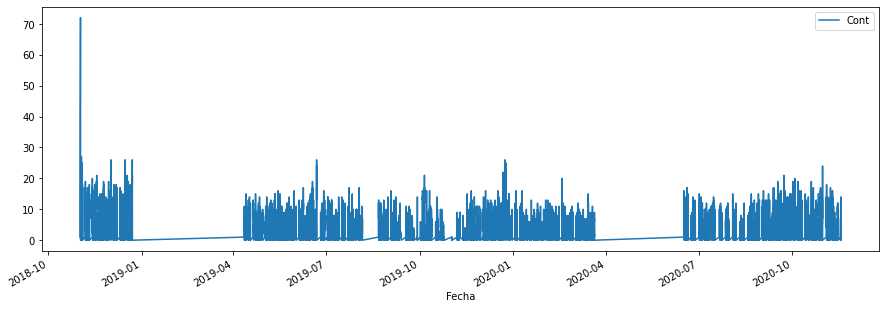

In [ ]:
dt=pd.concat([dtfI,dtfS])
dt.sort_index(inplace=True)
dt['Cont']=dt['conteo'].cumsum()
dt=dt[['Cont']]
dt.plot(figsize=(15,5))


In [ ]:
dt.head()

,Cont
Fecha,
2018-11-01 07:46:34,1
2018-11-01 07:48:15,2
2018-11-01 07:51:18,3
2018-11-01 07:51:58,4
2018-11-01 07:52:37,5


#Pasar datos a un excel

In [ ]:
#Data ocuapción por registros
import pandas as pd

toexcl = dt.reset_index()

toexcl.to_excel ('/content/Data.xlsx', index = False, header=True)

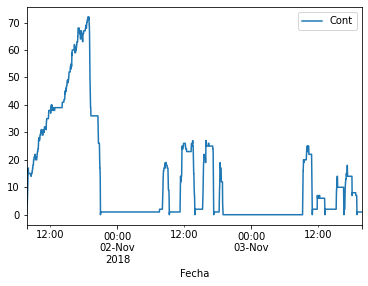

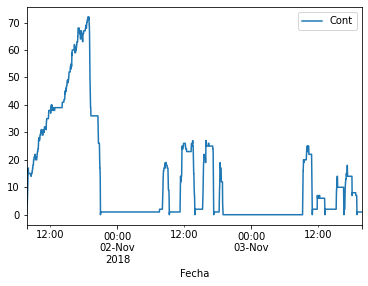

In [ ]:
#Data ocupacion por minutos
#Transformar base a minutos
toexclmin=dt.copy()
toexclmin=toexclmin.resample('T').last().bfill()
toexclmin.iloc[:3600,:].plot()
#a excel


toexclmin.to_excel ('/content/Data.xlsx', index = False, header=True)
toexclmin.iloc[:3600,:].plot()

#Visualización

In [ ]:
#Usar en caso de querer cargar una nueva base de datos
# format datetime column
#dtf["date"] = pd.to_datetime(dtf['Fecha'], format='%d.%m.%Y')
## create time series#
##ts = dtf.groupby("date")["Ocupación"].sum().rename("ocupa")
#ts.head()

In [ ]:
#ts.tail()

date
2020-03-20 16:53:05    4.0
2020-03-20 16:58:57    3.0
2020-03-20 17:11:08    2.0
2020-03-20 17:33:49    1.0
2020-03-20 17:37:22    0.0
Name: ocupa, dtype: float64

In [ ]:
##print("population --> len:", len(ts), "| mean:", round(ts.mean()), " | std:", round(ts.std()))
#w = 30
#print("moving --> len:", w, " | mean:", round(ts.ewm(span=w).mean()[-1]), " | std:", round(ts.ewm(span=w).std()[-1]))

population --> len: 31494 | mean: 7  | std: 6
moving --> len: 30  | mean: 4.0  | std: 2.0


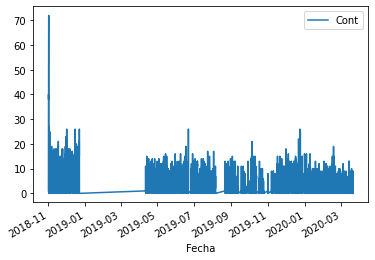

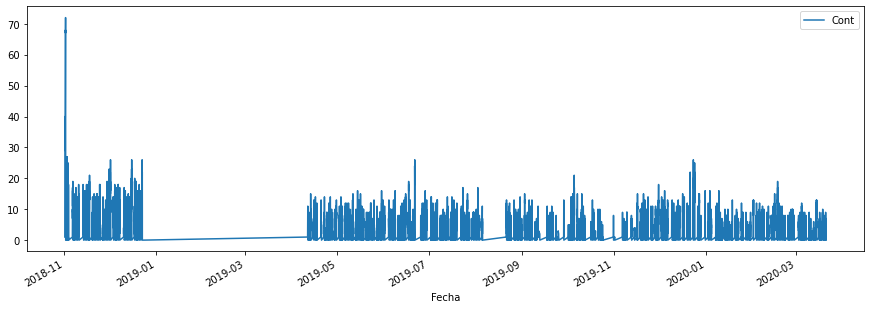

In [ ]:
from matplotlib import pyplot
dt.plot()
dt.plot(figsize=(15,5))
pyplot.show()

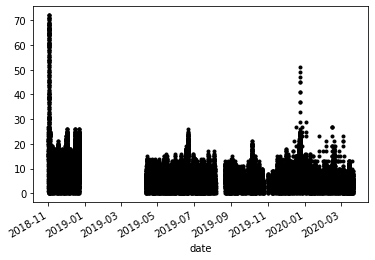

In [ ]:
dt.plot(style='k.')


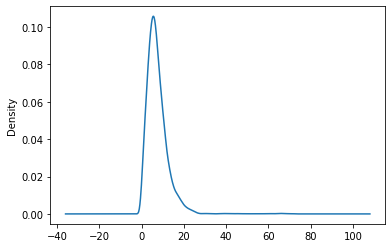

In [ ]:
dt.plot(kind='kde')
pyplot.show()

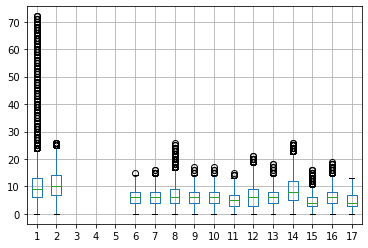

In [ ]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
groups = dt.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,18)
months.boxplot()
pyplot.show()

#ARIMA

In [ ]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For outliers detection
from sklearn import preprocessing, svm
## For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [ ]:
#dt = dt.reset_index()
dt = dt[['Cont']]
dt.tail()

,Cont
Fecha,
2020-03-20 16:53:05,4
2020-03-20 16:58:57,3
2020-03-20 17:11:08,2
2020-03-20 17:33:49,1
2020-03-20 17:37:22,0


In [ ]:
from pmdarima import auto_arima
auto_arima(dt['Cont'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

In [ ]:
'''
Plot ts with rolling mean and 95% confidence interval with rolling std.
:parameter    
  :param ts: pandas Series    
  :param window: num - for rolling stats
  :param plot_ma: bool - whether plot moving average
  :param plot_intervals: bool - whether plot upper and lower bounds
'''
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

In [ ]:
plot_ts(dt, window=30)


AttributeError: ignored

<Figure size 1080x360 with 0 Axes>

In [ ]:
'''
Find outliers using sklearn unsupervised support vetcor machine.
:parameter
    :param ts: pandas Series
    :param perc: float - percentage of outliers to look for
:return
    dtf with raw ts, outlier 1/0 (yes/no), numeric index
'''
def find_outliers(ts, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
    ## dtf output
    dtf_outliers = ts.to_frame(name="ts")
    dtf_outliers["index"] = range(len(ts))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers

In [ ]:
'''
Interpolate outliers in a ts.
'''
def remove_outliers(ts, outliers_idx, figsize=(15,5)):
    ts_clean = ts.copy()
    ts_clean.loc[outliers_idx] = np.nan
    ts_clean = ts_clean.interpolate(method="linear")
    ax = ts.plot(figsize=figsize, color="red", alpha=0.5,
         title="Remove outliers", label="original", legend=True)
    ts_clean.plot(ax=ax, grid=True, color="black",
                  label="interpolated", legend=True)
    plt.show()
    return ts_clean

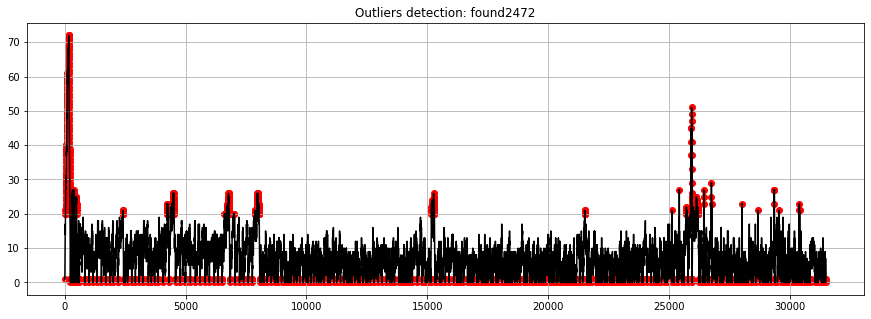

In [ ]:
dtf_outliers = find_outliers(ts, perc=0.05)

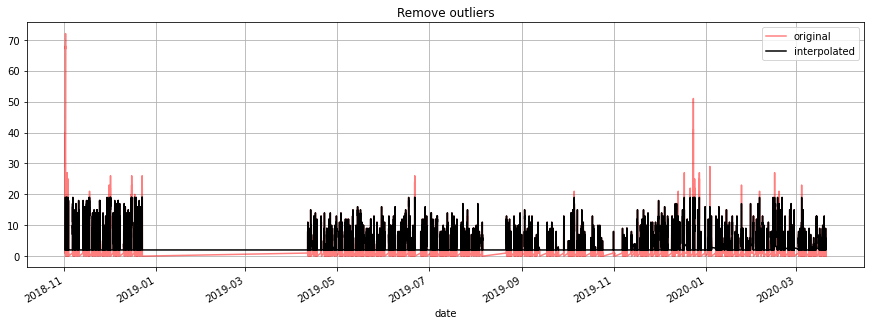

In [ ]:
## outliers index position
outliers_index_pos = dtf_outliers[dtf_outliers["outlier"]==1].index
## exclude outliers
ts_clean = remove_outliers(ts, outliers_idx=outliers_index_pos)

In [ ]:
'''
Test stationarity by:
    - running Augmented Dickey-Fuller test wiht 95%
    - plotting mean and variance of a sample from data
    - plottig autocorrelation and partial autocorrelation
'''
def test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30, figsize= 
                              (15,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(1,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(1,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        dtf_ts = ts.to_frame(name="ts")
        sample_size = int(len(ts)*sample)
        dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        dtf_ts["ts"].plot(ax=ts_ax, color="black", legend=False)
        dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red",
                            linestyle="--", linewidth=0.7)
        ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], 
                y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        dtf_ts["mean"].head(sample_size).plot(ax=ts_ax,
                legend=False, color="red", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.head(sample_size).index, 
                           y1=dtf_ts['lower'].head(sample_size), 
                           y2=dtf_ts['upper'].head(sample_size),
                           color='lightskyblue')
        
        ## test stationarity (Augmented Dickey-Fuller)
        adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag,
                                                  autolag="AIC")
        adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        p = round(p, 3)
        conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        ts_ax.set_title('Dickey-Fuller Test 95%: '+conclusion+
                        '(p value: '+str(p)+')')
        
        ## pacf (for AR) e acf (for MA) 
        smt.graphics.plot_pacf(ts, lags=maxlag, ax=pacf_ax, 
                 title="Partial Autocorrelation (for AR component)")
        smt.graphics.plot_acf(ts, lags=maxlag, ax=acf_ax,
                 title="Autocorrelation (for MA component)")
        plt.tight_layout()

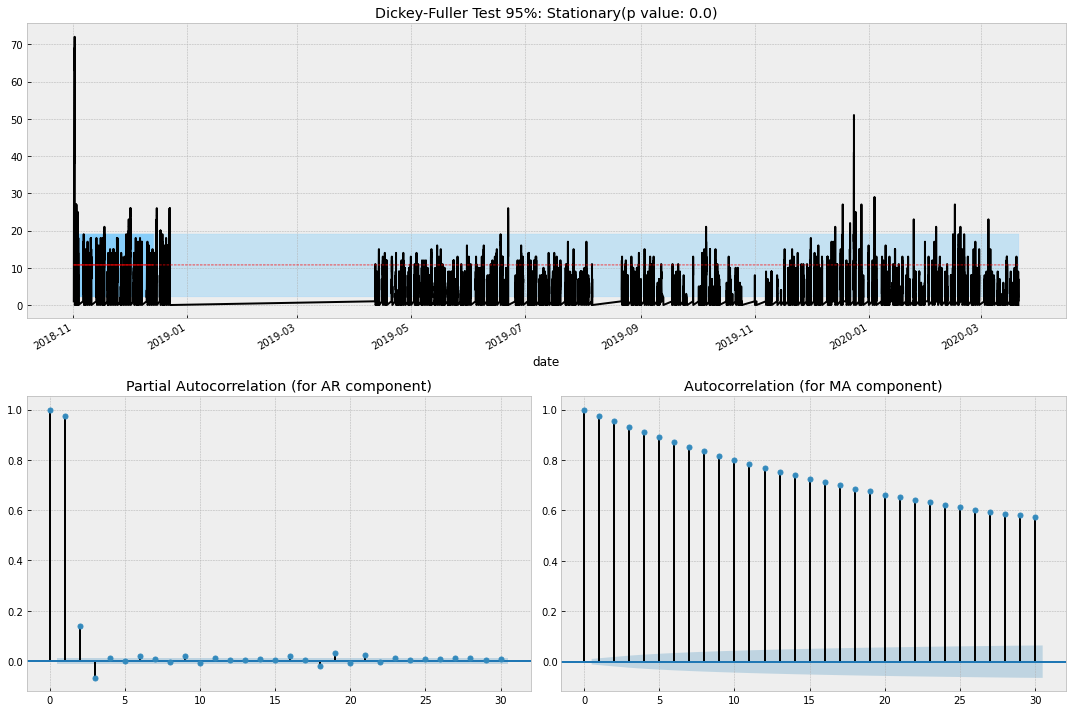

In [ ]:
test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30)

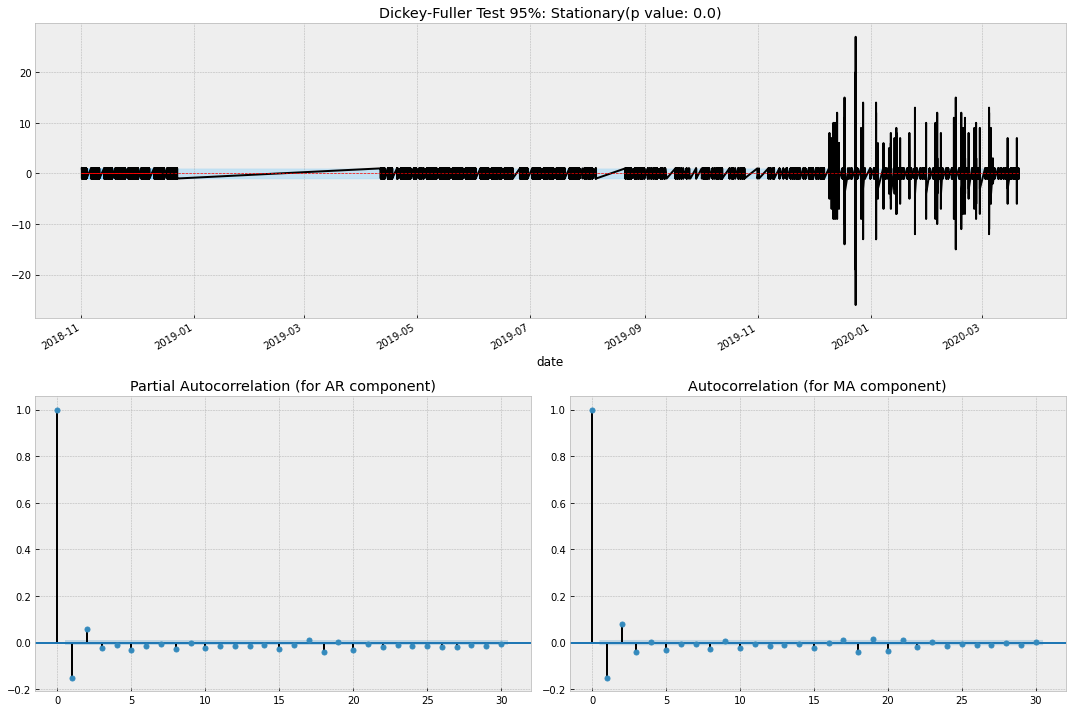

In [ ]:
diff_ts = ts - ts.shift(1)
diff_ts = diff_ts[(pd.notnull(diff_ts))]
test_stationarity_acf_pacf(diff_ts, sample=0.20, maxlag=30)

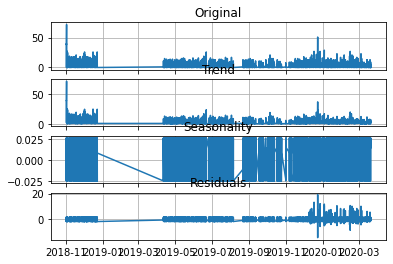

In [ ]:
decomposition = smt.seasonal_decompose(ts, freq=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid   
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=False)
ax[0].plot(ts)
ax[0].set_title('Original')
ax[0].grid(True) 
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[1].grid(True)  
ax[2].plot(seasonal)
ax[2].set_title('Seasonality')
ax[2].grid(True)  
ax[3].plot(residual)
ax[3].set_title('Residuals')
ax[3].grid(True)

In [ ]:
'''
Split train/test from any given data point.
:parameter
    :param ts: pandas Series
    :param test: num or str - test size (ex. 0.20) or index position
                 (ex. "yyyy-mm-dd", 1000)
:return
    ts_train, ts_test
'''
def split_train_test(ts, test=0.20, plot=True, figsize=(15,5)):
    ## define splitting point
    if type(test) is float:
        split = int(len(ts)*(1-test))
        perc = test
    elif type(test) is str:
        split = ts.reset_index()[ 
                      ts.reset_index().iloc[:,0]==test].index[0]
        perc = round(len(ts[split:])/len(ts), 2)
    else:
        split = test
        perc = round(len(ts[split:])/len(ts), 2)
    print("--- splitting at index: ", split, "|", 
          ts.index[split], "| test size:", perc, " ---")
    
    ## split ts
    ts_train = ts.head(split)
    ts_test = ts.tail(len(ts)-split)
    if plot is True:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, 
                               sharey=True, figsize=figsize)
        ts_train.plot(ax=ax[0], grid=True, title="Train", 
                      color="black")
        ts_test.plot(ax=ax[1], grid=True, title="Test", 
                     color="black")
        ax[0].set(xlabel=None)
        ax[1].set(xlabel=None)
        plt.show()
        
    return ts_train, ts_test

In [ ]:
## format datetime column
dtf["date"] = pd.to_datetime(dtf['Fecha'], format='%d.%m.%Y')
## create time series
ts = dtf.groupby("date")["Ocupación"].sum().rename("ocupa")
ts.head()


date
2018-11-01 07:46:34    1
2018-11-01 07:48:15    2
2018-11-01 07:51:18    3
2018-11-01 07:51:58    4
2018-11-01 07:52:37    5
Name: ocupa, dtype: int64

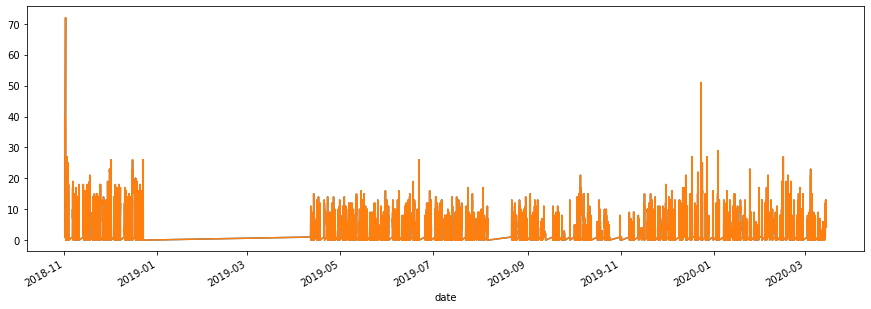

In [ ]:
train_data = ts[:len(ts)-500]
test_data = ts[len(ts)-500:]
from matplotlib import pyplot
train_data.plot()
train_data.plot(figsize=(15,5))
pyplot.show()

# PROPHET



In [ ]:
dtf = pd.read_excel('/content/MFull Hogar (72) (1).xlsx')
dtf_2=dtf[['Fecha','Ocupación']]

FileNotFoundError: ignored

In [ ]:
dtf_2
dtf_2['Datetime'] = pd.to_datetime(dtf_2['Fecha'])
dtf_2= dtf_2.set_index('Datetime')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#dtf_2.info()
dft_3=dtf_2[['Ocupación']]
dft_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31668 entries, 2018-11-01 07:46:34 to 2020-03-20 17:37:22
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Ocupación  31668 non-null  int64
dtypes: int64(1)
memory usage: 494.8 KB


In [ ]:


df_pr = dft_3.copy()
df_pr = dft_3.reset_index()
df_pr

,Datetime,Ocupación
0,2018-11-01 07:46:34,1
1,2018-11-01 07:48:15,2
2,2018-11-01 07:51:18,3
3,2018-11-01 07:51:58,4
4,2018-11-01 07:52:37,5
...,...,...
31663,2020-03-20 16:53:05,4
31664,2020-03-20 16:58:57,3
31665,2020-03-20 17:11:08,2
31666,2020-03-20 17:33:49,1


In [ ]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(dft_3)-1000]
test_data_pr = df_pr.iloc[len(dft_3)-1000:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1000,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
30506,2020-11-01 15:34:12,-5.013905,-137.897449,128.366934,-135.931918,129.000968,-1.239151,-1.239151,-1.239151,1.295968,1.295968,1.295968,-2.535119,-2.535119,-2.535119,0.0,0.0,0.0,-6.253056
30507,2020-12-01 15:34:12,-6.151801,-163.481176,154.925090,-164.439381,154.230640,1.731684,1.731684,1.731684,1.295968,1.295968,1.295968,0.435716,0.435716,0.435716,0.0,0.0,0.0,-4.420118
30508,2021-01-01 15:34:12,-7.327627,-191.464400,188.674147,-192.319377,185.657258,1.543747,1.543747,1.543747,1.295968,1.295968,1.295968,0.247779,0.247779,0.247779,0.0,0.0,0.0,-5.783881
30509,2021-02-01 15:34:12,-8.503454,-218.496593,219.404327,-224.263156,217.386301,1.714853,1.714853,1.714853,1.295968,1.295968,1.295968,0.418886,0.418886,0.418886,0.0,0.0,0.0,-6.788600
30510,2021-03-01 15:34:12,-9.565490,-253.842924,247.617977,-255.465949,244.372064,1.714853,1.714853,1.714853,1.295968,1.295968,1.295968,0.418886,0.418886,0.418886,0.0,0.0,0.0,-7.850637


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-1000:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
2020-04-01 16:09:41,4.214000
2020-05-01 16:09:41,3.740836
2020-06-01 16:09:41,2.559589
2020-07-01 16:09:41,0.172405
2020-08-01 16:09:41,1.077898
2020-09-01 16:09:41,-1.799169
2020-10-01 16:09:41,-3.046864
2020-11-01 16:09:41,-7.281866
2020-12-01 16:09:41,-5.840764


In [ ]:
train_data = dtf[:len(dtf)-1000]
test_data = dtf[len(dtf)-1000:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



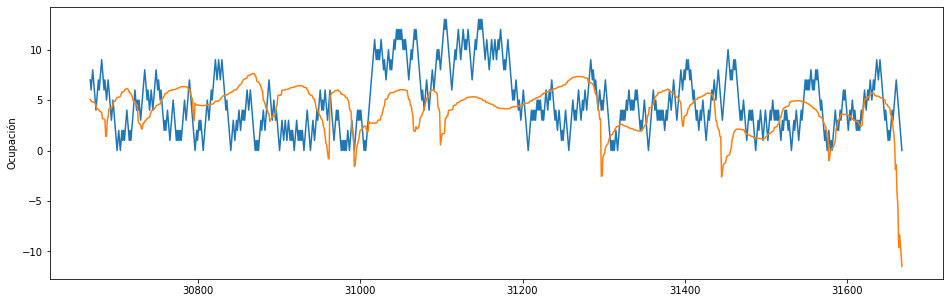

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Ocupación"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Ocupación'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = dtf['Ocupación'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 13.646758151987077
RMSE Error: 3.694151885343519
Mean: 7.412529998736895


# SERIA BUENO USAR ESTA GRAFICA

In [ ]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

NameError: ignored

#LSTM

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

df=pd.read_excel('/content/MFull_Hogar.xlsx', index_col=0) 
print(df)

                     Ocupacion
Fecha                         
2018-11-01 07:46:34          1
2018-11-01 07:48:15          2
2018-11-01 07:51:18          3
2018-11-01 07:51:58          4
2018-11-01 07:52:37          5
...                        ...
2020-03-20 16:53:05          4
2020-03-20 16:58:57          3
2020-03-20 17:11:08          2
2020-03-20 17:33:49          1
2020-03-20 17:37:22          0

[31668 rows x 1 columns]


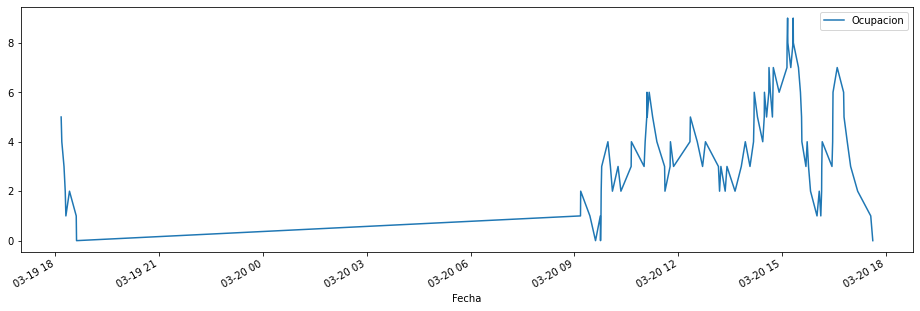

In [ ]:
train_data = df[:len(df)-100]
test_data = df[len(df)-100:]
test_data['Ocupacion'].plot(figsize = (16,5), legend=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 50
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input,batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input,n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
31518/31518 [==============================] - 1004s 32ms/step - loss: 4227967.5000
Epoch 2/5
31518/31518 [==============================] - 994s 32ms/step - loss: 2.1275e-04
Epoch 3/5
31518/31518 [==============================] - 989s 31ms/step - loss: 2.0172e-04
Epoch 4/5
31518/31518 [==============================] - 1006s 32ms/step - loss: 2.0016e-04
Epoch 5/5
31518/31518 [==============================] - 994s 32ms/step - loss: 1.9958e-04


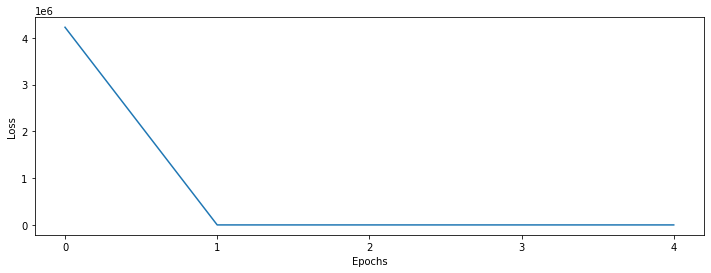

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions_scaled

[array([0.04986132], dtype=float32),
 array([0.04516099], dtype=float32),
 array([0.04211802], dtype=float32),
 array([0.04055884], dtype=float32),
 array([0.04010836], dtype=float32),
 array([0.04034727], dtype=float32),
 array([0.04091252], dtype=float32),
 array([0.04154355], dtype=float32),
 array([0.04208659], dtype=float32),
 array([0.04247525], dtype=float32),
 array([0.04270294], dtype=float32),
 array([0.04279666], dtype=float32),
 array([0.0427967], dtype=float32),
 array([0.0427431], dtype=float32),
 array([0.04266832], dtype=float32),
 array([0.04259458], dtype=float32),
 array([0.04253429], dtype=float32),
 array([0.04249204], dtype=float32),
 array([0.04246721], dtype=float32),
 array([0.04245634], dtype=float32),
 array([0.042455], dtype=float32),
 array([0.04245905], dtype=float32),
 array([0.04246524], dtype=float32),
 array([0.04247137], dtype=float32),
 array([0.04247628], dtype=float32),
 array([0.04247956], dtype=float32),
 array([0.0424813], dtype=float32),
 array

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions= lstm_predictions.astype(int) 
lstm_predictions

array([[3],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
    

In [ ]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ocupacion,LSTM_Predictions
Fecha,,
2020-03-19 18:09:56,5,3
2020-03-19 18:11:04,4,3
2020-03-19 18:14:52,3,3
2020-03-19 18:17:00,2,2
2020-03-19 18:18:08,1,2
...,...,...
2020-03-20 16:53:05,4,3
2020-03-20 16:58:57,3,3
2020-03-20 17:11:08,2,3


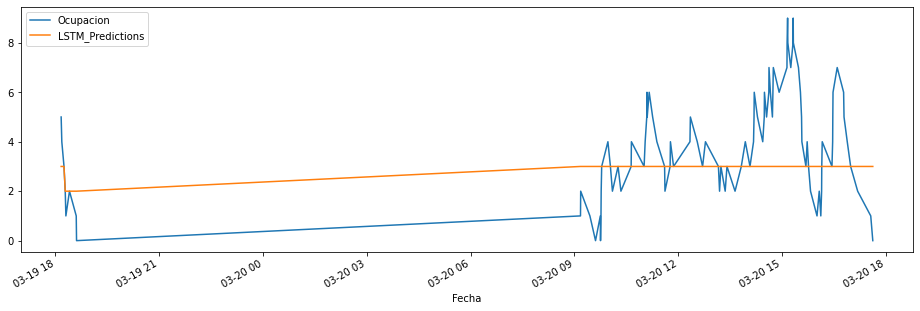

In [ ]:
test_data['Ocupacion'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [ ]:
lstm_rmse_error = rmse(test_data['Ocupacion'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Ocupacion'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 5.09
RMSE Error: 2.2561028345356955
Mean: 7.412529998736895


#PyTorch Data Clima y exogenas, dia seamana, hora festivos




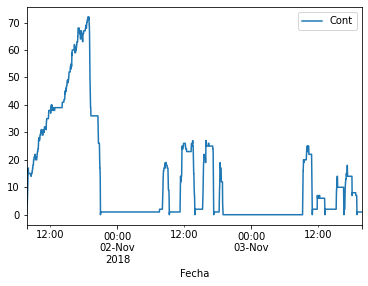

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()

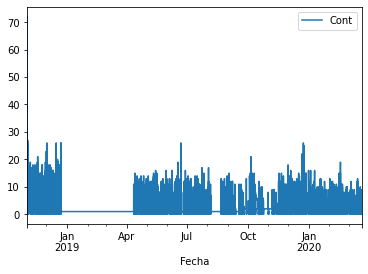

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.plot()

In [ ]:
dtmin['diasem']=dtmin.index.to_series().dt.dayofweek
dtmin.tail()

,Cont,diasem
Fecha,,
2020-03-20 17:33:00,1.0,4
2020-03-20 17:34:00,0.0,4
2020-03-20 17:35:00,0.0,4
2020-03-20 17:36:00,0.0,4
2020-03-20 17:37:00,0.0,4


In [ ]:
##Incluir festivos
Fest = pd.read_excel('/content/drive/My Drive/colab bases/festivosCol2018-2020.xlsx')
Fest['Festivos']=pd.to_datetime(Fest['Festivos'])
Fest.dtypes


Festivos    datetime64[ns]
dtype: object

In [ ]:
dtmin['Festivo']=0
dtmin['Festivo'][dtmin.index.to_series().dt.date.isin(Fest['Festivos'].dt.date)]=1
dtmin[dtmin['Festivo']==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo
Fecha,,,
2018-11-05 00:00:00,1.0,0,1
2018-11-05 00:01:00,1.0,0,1
2018-11-05 00:02:00,1.0,0,1
2018-11-05 00:03:00,1.0,0,1
2018-11-05 00:04:00,1.0,0,1
...,...,...,...
2020-02-24 23:55:00,1.0,0,1
2020-02-24 23:56:00,1.0,0,1
2020-02-24 23:57:00,1.0,0,1


In [ ]:
#Clima
Clima = pd.read_excel('/content/drive/My Drive/colab bases/Meteorológico.xlsx')
Clima = Clima[['Fecha','Valor']]
Clima['Fecha']=pd.to_datetime(Clima['Fecha']).dt.date
Clima.set_index('Fecha',inplace=True)
Clima.head()

,Valor
Fecha,
2018-08-25,1
2018-08-26,10
2018-08-27,3
2018-08-28,23
2018-08-29,5


In [ ]:
dtmin['Fecha1'] = dtmin.index.to_series().dt.date
base = dtmin.join(Clima,on='Fecha1',how='left')
base= base[['Cont','diasem','Festivo','Valor']]
base['hora'] = base.index.to_series().dt.hour
base.tail()

,Cont,diasem,Festivo,Valor,hora
Fecha,,,,,
2020-03-20 17:33:00,1.0,4,0,4,17
2020-03-20 17:34:00,0.0,4,0,4,17
2020-03-20 17:35:00,0.0,4,0,4,17
2020-03-20 17:36:00,0.0,4,0,4,17
2020-03-20 17:37:00,0.0,4,0,4,17


In [ ]:
base.isna().sum()

Cont       0
diasem     0
Festivo    0
Valor      0
hora       0
dtype: int64

In [ ]:
basetorch = base.copy()
basetorch['Predict']=np.nan
basetorch['Predict'][:-1] = basetorch['Cont'][1:]
basetorch=basetorch[:-1]
basetorch.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,1.0,3,0,0,7,2.0
2018-11-01 07:47:00,2.0,3,0,0,7,2.0
2018-11-01 07:48:00,2.0,3,0,0,7,4.0
2018-11-01 07:49:00,4.0,3,0,0,7,4.0
2018-11-01 07:50:00,4.0,3,0,0,7,4.0


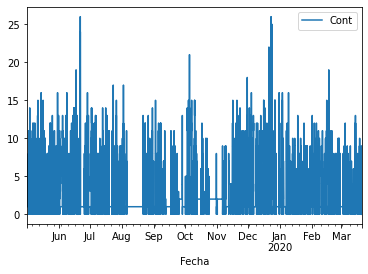

In [ ]:
#Quitar fechas ruido
fechas = basetorch.index.to_series()
basetorch = basetorch[(fechas>'2019-05-01')]
basetorch[['Cont']].plot()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class REDTORCH(nn.Module):
    def __init__(self, inputs, hidden, outputs):
        super(REDTORCH, self).__init__()
        self.linear1 = nn.Linear(inputs, hidden)
        self.linear2 = nn.Linear(hidden, outputs)

    def forward(self, x):
        h_linear = self.linear1(x)
        y_pred = self.linear2(h_linear)
        return F.relu(y_pred)

In [ ]:
modeloto=REDTORCH(5,16,1)

In [ ]:
maximoclima = basetorch['Valor'].max()
basetorch['Valor']=basetorch['Valor']/maximoclima
maximoC = basetorch['Cont'].max()
basetorch['Cont']=basetorch['Cont']/maximoC
basetorch['Predict']=basetorch['Predict']/maximoC
basetorch['diasem']=basetorch['diasem']/7
basetorch['Festivo']=basetorch['Festivo']/1
basetorch['hora']=basetorch['hora']/24
basetorch.head()

,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2019-05-01 00:01:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:02:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:03:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:04:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:05:00,0.038462,0.285714,1.0,0.5,0.0,0.038462


In [ ]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(modeloto.parameters(), lr=0.01)

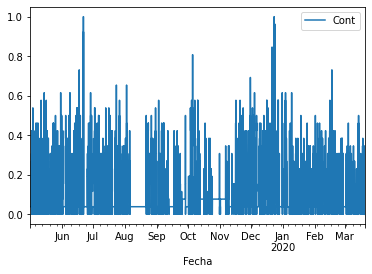

In [ ]:
basetorch[['Cont']].plot()

In [ ]:
entrada = basetorch[['Cont','diasem','Festivo','Valor','hora']].values
salida = basetorch[['Predict']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entrada, salida, test_size=0.33)
X_train=torch.from_numpy(X_train).type(torch.float)
y_train=torch.from_numpy(y_train).type(torch.float)
X_test=torch.from_numpy(X_test).type(torch.float)
y_test=torch.from_numpy(y_test).type(torch.float)

In [ ]:
for  i  in range (1000):
  modeloto.zero_grad()
  pred = modeloto(X_train)
  loss = criterion(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

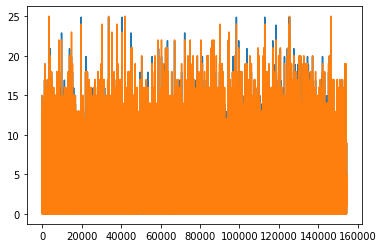

In [ ]:
predichos = modeloto(X_test)
plt.plot(predichos.detach().numpy()*maximoC)
plt.plot(y_test.detach().numpy()*maximoC)


In [ ]:
np.sqrt(np.power(predichos.detach().numpy()-y_test.detach().numpy(),2).mean())*maximoC

0.23093866184353828

Modelo Torch #2 fecha ant

In [ ]:
basetorch2 = base.copy()
basetorch2['Predict']=np.nan
basetorch2['Predict'][:-3600] = basetorch2['Cont'][3600:]
basetorch=basetorch2[:-3600]
basetorch2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,1.0,3,0,0,7,1.0
2018-11-01 07:47:00,2.0,3,0,0,7,1.0
2018-11-01 07:48:00,2.0,3,0,0,7,1.0
2018-11-01 07:49:00,4.0,3,0,0,7,1.0
2018-11-01 07:50:00,4.0,3,0,0,7,1.0


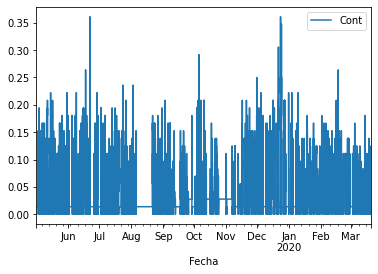

In [ ]:
#Quitar fechas ruido
fechas = basetorch2.index.to_series()
basetorch2 = basetorch2[(fechas>'2019-05-01')]
basetorch2[['Cont']].plot()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class REDTORCH(nn.Module):
    def __init__(self, inputs, hidden, outputs):
        super(REDTORCH, self).__init__()
        self.linear1 = nn.Linear(inputs, hidden)
        self.linear2 = nn.Linear(hidden, outputs)

    def forward(self, x):
        h_linear = self.linear1(x)
        y_pred = self.linear2(h_linear)
        return F.relu(y_pred)

In [ ]:
modeloto=REDTORCH(5,16,1)

In [ ]:
maximoclima = basetorch2['Valor'].max()
basetorch2['Valor']=basetorch2['Valor']/maximoclima
maximoC = basetorch2['Cont'].max()
basetorch2['Cont']=basetorch2['Cont']/maximoC
basetorch2['Predict']=basetorch2['Predict']/maximoC
basetorch2['diasem']=basetorch2['diasem']/7
basetorch2['Festivo']=basetorch2['Festivo']/1
basetorch2['hora']=basetorch2['hora']/24
basetorch2.head()

,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,0.013889,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:47:00,0.027778,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:48:00,0.027778,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:49:00,0.055556,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:50:00,0.055556,0.428571,0.0,0.0,0.291667,0.013889


In [ ]:
entrada = basetorch2[['Cont','diasem','Festivo','Valor','hora']].values
salida = basetorch2[['Predict']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entrada, salida, test_size=0.33)
X_train=torch.from_numpy(X_train).type(torch.float)
y_train=torch.from_numpy(y_train).type(torch.float)
X_test=torch.from_numpy(X_test).type(torch.float)
y_test=torch.from_numpy(y_test).type(torch.float)

In [ ]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(modeloto.parameters(), lr=0.01)

In [ ]:
for  i  in range (1000):
  modeloto.zero_grad()
  pred = modeloto(X_train)
  loss = criterion(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

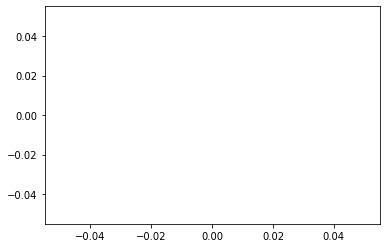

In [ ]:
predichos = modeloto(X_test)
plt.plot(predichos.detach().numpy()*maximoC)
#plt.plot(y_test.detach().numpy()*maximoC)

In [ ]:
np.sqrt(np.power(predichos.detach().numpy()-y_test.detach().numpy(),2).mean())*maximoC

nan

#Prophet base minutos 1000 mins 2 meses

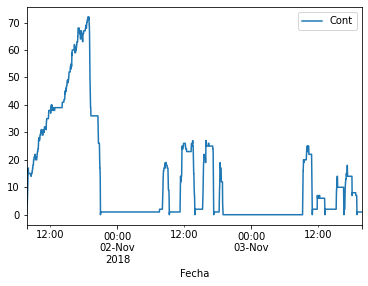

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-02-01')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Cont
Fecha,
2020-03-20 17:33:00,1.0
2020-03-20 17:34:00,0.0
2020-03-20 17:35:00,0.0
2020-03-20 17:36:00,0.0
2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-1000]
test_data_pr = df_pr.iloc[len(df_pr)-1000:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1000,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70172,2020-03-20 17:33:00,2.466642,3.055967,6.940552,2.382746,2.516341,2.572859,2.572859,2.572859,2.159396,2.159396,2.159396,0.413463,0.413463,0.413463,0.0,0.0,0.0,5.039502
70173,2020-03-20 17:34:00,2.466715,3.036758,7.025723,2.382132,2.516608,2.553014,2.553014,2.553014,2.138797,2.138797,2.138797,0.414217,0.414217,0.414217,0.0,0.0,0.0,5.019729
70174,2020-03-20 17:35:00,2.466787,3.054265,7.071654,2.381606,2.516875,2.533009,2.533009,2.533009,2.118038,2.118038,2.118038,0.414971,0.414971,0.414971,0.0,0.0,0.0,4.999795
70175,2020-03-20 17:36:00,2.466859,2.990048,6.860448,2.380930,2.517143,2.512847,2.512847,2.512847,2.097122,2.097122,2.097122,0.415725,0.415725,0.415725,0.0,0.0,0.0,4.979706
70176,2020-03-20 17:37:00,2.466931,2.988023,6.983896,2.380212,2.517410,2.492531,2.492531,2.492531,2.076053,2.076053,2.076053,0.416478,0.416478,0.416478,0.0,0.0,0.0,4.959463


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-1000:]['ds'], "Pred" : prophet_pred[-1000:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-20 00:58:00,1.390974
2020-03-20 00:59:00,1.388818
2020-03-20 01:00:00,1.386690
2020-03-20 01:01:00,1.384591
2020-03-20 01:02:00,1.382521
...,...
2020-03-20 17:33:00,5.039502
2020-03-20 17:34:00,5.019729
2020-03-20 17:35:00,4.999795


In [ ]:
train_data = df_tst[:len(df_tst)-1000]
test_data = df_tst[len(df_tst)-1000:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



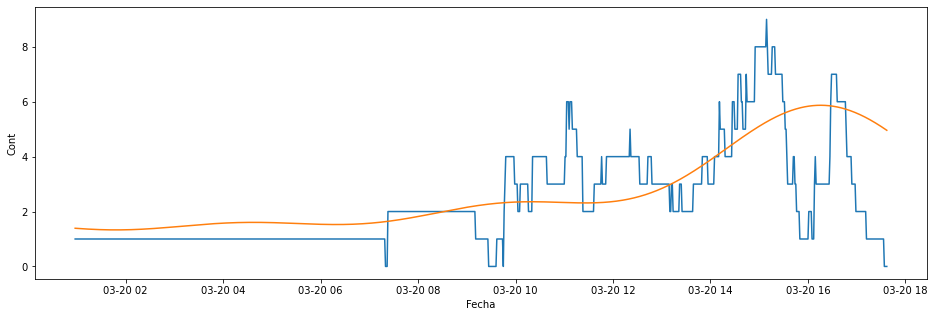

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.2770251565145
RMSE Error: 1.5089814964122323
Mean: 1.7464411416845975


In [ ]:
#Prueba con datos nuevos

#Prophet base minutos 1000 mins 4 meses

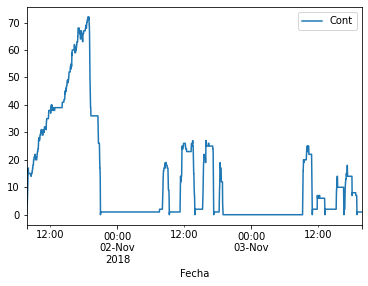

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2019-12-30')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
117692,2020-03-20 17:33:00,1.0
117693,2020-03-20 17:34:00,0.0
117694,2020-03-20 17:35:00,0.0
117695,2020-03-20 17:36:00,0.0
117696,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-1000]
test_data_pr = df_pr.iloc[len(df_pr)-1000:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1000,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Descubrimiento de América [Discovery of America](Observed),Descubrimiento de América [Discovery of America](Observed)_lower,Descubrimiento de América [Discovery of America](Observed)_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día de los Reyes Magos [Epiphany](Observed),Día de los Reyes Magos [Epiphany](Observed)_lower,Día de los Reyes Magos [Epiphany](Observed)_upper,Día del Trabajo [Labour Day],...,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed),San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_lower,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
117692,2020-03-20 17:33:00,2.073032,2.328015,6.281715,2.071088,2.073032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.326229,2.326229,2.326229,2.132598,2.132598,2.132598,0.0,0.0,0.0,0.193631,0.193631,0.193631,0.0,0.0,0.0,4.399261
117693,2020-03-20 17:34:00,2.073060,2.455726,6.476086,2.071094,2.073060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.308067,2.308067,2.308067,2.113847,2.113847,2.113847,0.0,0.0,0.0,0.194220,0.194220,0.194220,0.0,0.0,0.0,4.381127
117694,2020-03-20 17:35:00,2.073089,2.399833,6.219513,2.071100,2.073089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-1000:]['ds'], "Pred" : prophet_pred[-1000:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-20 00:58:00,1.175931
2020-03-20 00:59:00,1.173057
2020-03-20 01:00:00,1.170204
2020-03-20 01:01:00,1.167374
2020-03-20 01:02:00,1.164568
...,...
2020-03-20 17:33:00,4.399261
2020-03-20 17:34:00,4.381127
2020-03-20 17:35:00,4.362819


In [ ]:
train_data = df_tst[:len(df_tst)-1000]
test_data = df_tst[len(df_tst)-1000:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



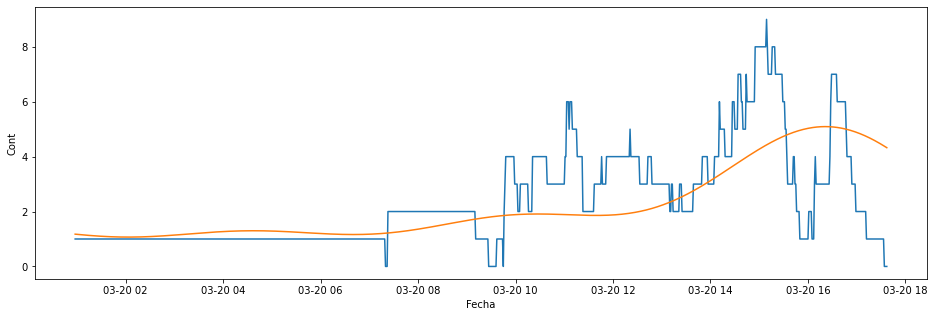

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.1961955762605316
RMSE Error: 1.4819566715192896
Mean: 1.734487709967119


In [ ]:
#Prueba con datos nuevos

#Prophet base minutos 1000 mins 6 meses

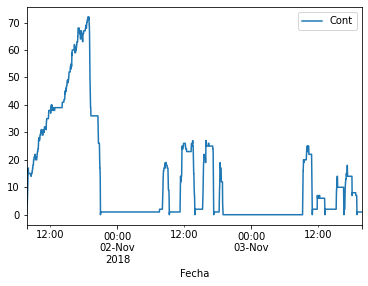

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2019-10-30')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
205532,2020-03-20 17:33:00,1.0
205533,2020-03-20 17:34:00,0.0
205534,2020-03-20 17:35:00,0.0
205535,2020-03-20 17:36:00,0.0
205536,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-1000]
test_data_pr = df_pr.iloc[len(df_pr)-1000:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1000,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Descubrimiento de América [Discovery of America](Observed),Descubrimiento de América [Discovery of America](Observed)_lower,Descubrimiento de América [Discovery of America](Observed)_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día de los Reyes Magos [Epiphany](Observed),Día de los Reyes Magos [Epiphany](Observed)_lower,Día de los Reyes Magos [Epiphany](Observed)_upper,Día del Trabajo [Labour Day],...,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed),San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_lower,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
205532,2020-03-20 17:33:00,1.694759,1.756261,6.309728,1.694759,1.694759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.357681,2.357681,2.357681,2.319459,2.319459,2.319459,0.0,0.0,0.0,0.038222,0.038222,0.038222,0.0,0.0,0.0,4.052440
205533,2020-03-20 17:34:00,1.694762,1.513892,6.316735,1.694762,1.694762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.337435,2.337435,2.337435,2.298670,2.298670,2.298670,0.0,0.0,0.0,0.038765,0.038765,0.038765,0.0,0.0,0.0,4.032197
205534,2020-03-20 17:35:00,1.694764,1.830247,6.400675,1.694764,1.694764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-1000:]['ds'], "Pred" : prophet_pred[-1000:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-20 00:58:00,0.653989
2020-03-20 00:59:00,0.650682
2020-03-20 01:00:00,0.647403
2020-03-20 01:01:00,0.644151
2020-03-20 01:02:00,0.640929
...,...
2020-03-20 17:33:00,4.052440
2020-03-20 17:34:00,4.032197
2020-03-20 17:35:00,4.011765


In [ ]:
train_data = df_tst[:len(df_tst)-1000]
test_data = df_tst[len(df_tst)-1000:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



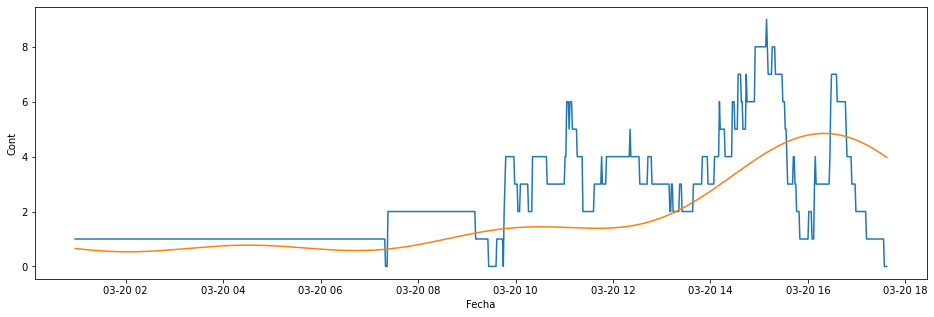

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.6214424235497336
RMSE Error: 1.6190869104374026
Mean: 1.8254669475568877


In [ ]:
#Prueba con datos nuevos

#Prophet base minutos 7200 mins 6 meses 

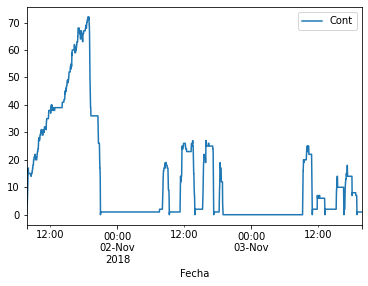

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2019-10-30')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
205532,2020-03-20 17:33:00,1.0
205533,2020-03-20 17:34:00,0.0
205534,2020-03-20 17:35:00,0.0
205535,2020-03-20 17:36:00,0.0
205536,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-7200]
test_data_pr = df_pr.iloc[len(df_pr)-7200:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=7200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Descubrimiento de América [Discovery of America](Observed),Descubrimiento de América [Discovery of America](Observed)_lower,Descubrimiento de América [Discovery of America](Observed)_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día de los Reyes Magos [Epiphany](Observed),Día de los Reyes Magos [Epiphany](Observed)_lower,Día de los Reyes Magos [Epiphany](Observed)_upper,Día del Trabajo [Labour Day],...,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed),San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_lower,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
205532,2020-03-20 17:33:00,1.400714,1.114732,6.381258,0.866910,1.901321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.332070,2.332070,2.332070,2.328213,2.328213,2.328213,0.0,0.0,0.0,0.003858,0.003858,0.003858,0.0,0.0,0.0,3.732785
205533,2020-03-20 17:34:00,1.400706,1.252484,6.280148,0.866779,1.902019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.311822,2.311822,2.311822,2.307434,2.307434,2.307434,0.0,0.0,0.0,0.004388,0.004388,0.004388,0.0,0.0,0.0,3.712528
205534,2020-03-20 17:35:00,1.400698,1.216599,6.028706,0.866647,1.902718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7200:]['ds'], "Pred" : prophet_pred[-7200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-15 17:38:00,2.843588
2020-03-15 17:39:00,2.822217
2020-03-15 17:40:00,2.800679
2020-03-15 17:41:00,2.778976
2020-03-15 17:42:00,2.757112
...,...
2020-03-20 17:33:00,3.732785
2020-03-20 17:34:00,3.712528
2020-03-20 17:35:00,3.692084


In [ ]:
train_data = df_tst[:len(df_tst)-7200]
test_data = df_tst[len(df_tst)-7200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



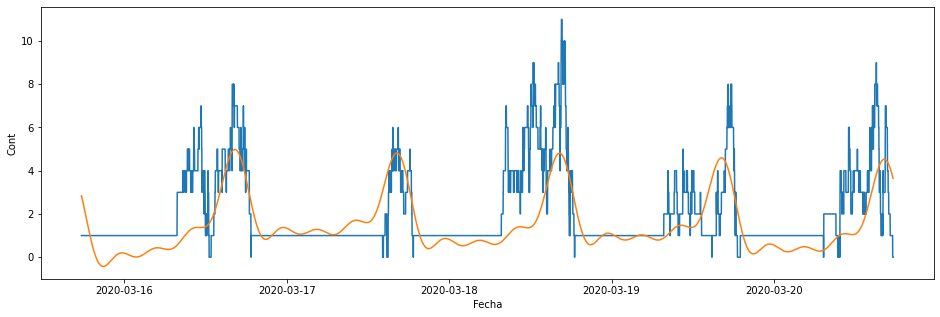

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.3781930401485214
RMSE Error: 1.5421391118016952
Mean: 1.8254669475568877


In [ ]:
#Prueba con datos nuevos

#Prophet base minutos 7200 mins 4 meses 

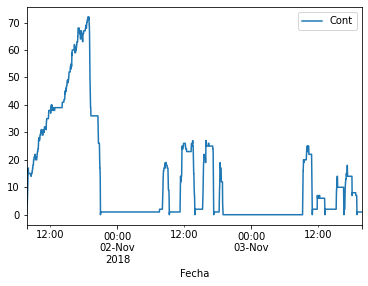

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2019-12-30')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
117692,2020-03-20 17:33:00,1.0
117693,2020-03-20 17:34:00,0.0
117694,2020-03-20 17:35:00,0.0
117695,2020-03-20 17:36:00,0.0
117696,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-7200]
test_data_pr = df_pr.iloc[len(df_pr)-7200:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=7200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Descubrimiento de América [Discovery of America](Observed),Descubrimiento de América [Discovery of America](Observed)_lower,Descubrimiento de América [Discovery of America](Observed)_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día de los Reyes Magos [Epiphany](Observed),Día de los Reyes Magos [Epiphany](Observed)_lower,Día de los Reyes Magos [Epiphany](Observed)_upper,Día del Trabajo [Labour Day],...,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed),San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_lower,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
117692,2020-03-20 17:33:00,2.408211,1.700906,7.717123,0.238342,4.464956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.324692,2.324692,2.324692,2.140181,2.140181,2.140181,0.0,0.0,0.0,0.184510,0.184510,0.184510,0.0,0.0,0.0,4.732902
117693,2020-03-20 17:34:00,2.408265,1.802810,7.702061,0.237968,4.465365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.306620,2.306620,2.306620,2.121593,2.121593,2.121593,0.0,0.0,0.0,0.185026,0.185026,0.185026,0.0,0.0,0.0,4.714885
117694,2020-03-20 17:35:00,2.408320,1.827377,7.651583,0.237595,4.465773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7200:]['ds'], "Pred" : prophet_pred[-7200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-15 17:38:00,3.327919
2020-03-15 17:39:00,3.308787
2020-03-15 17:40:00,3.289500
2020-03-15 17:41:00,3.270063
2020-03-15 17:42:00,3.250477
...,...
2020-03-20 17:33:00,4.732902
2020-03-20 17:34:00,4.714885
2020-03-20 17:35:00,4.696696


In [ ]:
train_data = df_tst[:len(df_tst)-7200]
test_data = df_tst[len(df_tst)-7200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



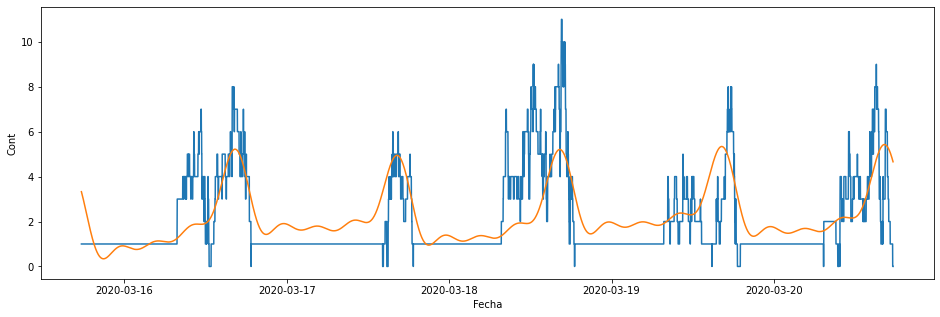

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.109299852494942
RMSE Error: 1.4523428839275323
Mean: 1.734487709967119


In [ ]:
#Prueba con datos nuevos

#Prophet base minutos 7200 mins 2 meses 

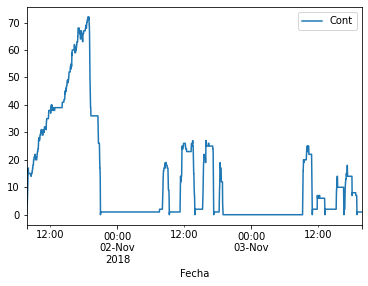

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-02-01')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
70172,2020-03-20 17:33:00,1.0
70173,2020-03-20 17:34:00,0.0
70174,2020-03-20 17:35:00,0.0
70175,2020-03-20 17:36:00,0.0
70176,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-7200]
test_data_pr = df_pr.iloc[len(df_pr)-7200:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=7200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día del Trabajo [Labour Day],Día del Trabajo [Labour Day]_lower,Día del Trabajo [Labour Day]_upper,Independencia de Cartagena [Independence of Cartagena](Observed),Independencia de Cartagena [Independence of Cartagena](Observed)_lower,Independencia de Cartagena [Independence of Cartagena](Observed)_upper,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70172,2020-03-20 17:33:00,2.264607,-2.482655,12.376855,-4.554459,9.460846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.692853,2.692853,2.692853,2.164290,2.164290,2.164290,0.0,0.0,0.0,0.528563,0.528563,0.528563,0.0,0.0,0.0,4.957460
70173,2020-03-20 17:34:00,2.264660,-2.094687,12.158231,-4.555918,9.463559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.673233,2.673233,2.673233,2.143881,2.143881,2.143881,0.0,0.0,0.0,0.529352,0.529352,0.529352,0.0,0.0,0.0,4.937893
70174,2020-03-20 17:35:00,2.264713,-2.356615,12.358852,-4.557378,9.466271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.653458,2.653458,2.653458,2.123317,2.123317,2.123317,0.0,0.0,0.0,0.530141,0.530141,0.530141,0.0,0.0,0.0,4.918172
70175,2020-03-20 17:36:00,2.264767,-2.598255,12.128390,-4.55

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7200:]['ds'], "Pred" : prophet_pred[-7200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-15 17:38:00,3.420066
2020-03-15 17:39:00,3.399012
2020-03-15 17:40:00,3.377822
2020-03-15 17:41:00,3.356501
2020-03-15 17:42:00,3.335051
...,...
2020-03-20 17:33:00,4.957460
2020-03-20 17:34:00,4.937893
2020-03-20 17:35:00,4.918172


In [ ]:
train_data = df_tst[:len(df_tst)-7200]
test_data = df_tst[len(df_tst)-7200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



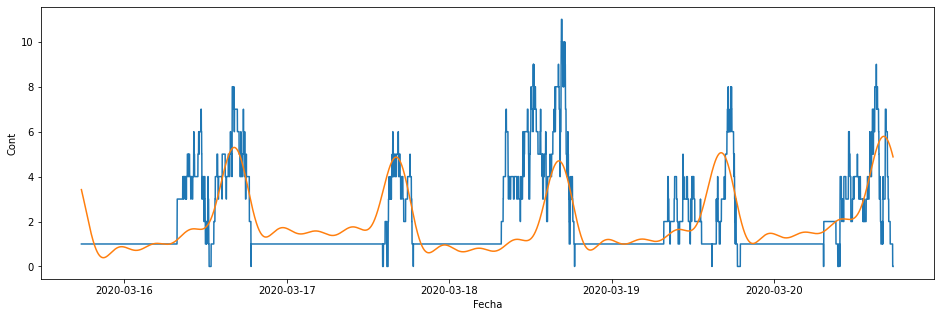

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.232562689149427
RMSE Error: 1.4941762577251143
Mean: 1.7464411416845975


In [ ]:
#Prueba con datos nuevos

#Prueba Prophet con datos nuevos, pred a octubre 5 días

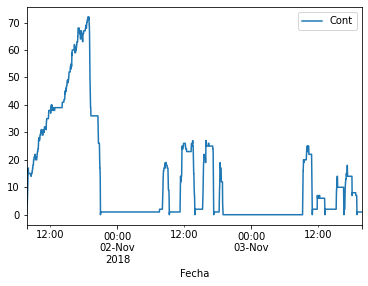

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()

In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-09-01')]
df_pr = df_pr[(fechas<='2020-10-17 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
67292,2020-10-17 17:33:00,4.0
67293,2020-10-17 17:34:00,4.0
67294,2020-10-17 17:35:00,4.0
67295,2020-10-17 17:36:00,4.0
67296,2020-10-17 17:37:00,4.0


In [ ]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-7200]
test_data_pr = df_pr.iloc[len(df_pr)-7200:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=7200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67292,2020-10-17 17:33:00,1.779150,-2.408218,11.217700,-4.743378,7.658053,3.302232,3.302232,3.302232,2.742286,2.742286,2.742286,0.559946,0.559946,0.559946,0.0,0.0,0.0,5.081382
67293,2020-10-17 17:34:00,1.779051,-2.109660,11.736158,-4.745904,7.658841,3.271061,3.271061,3.271061,2.713001,2.713001,2.713001,0.558060,0.558060,0.558060,0.0,0.0,0.0,5.050112
67294,2020-10-17 17:35:00,1.778952,-1.717190,11.577071,-4.748431,7.659629,3.239626,3.239626,3.239626,2.683455,2.683455,2.683455,0.556172,0.556172,0.556172,0.0,0.0,0.0,5.018578
67295,2020-10-17 17:36:00,1.778853,-2.495987,11.432843,-4.750957,7.660416,3.207933,3.207933,3.207933,2.653651,2.653651,2.653651,0.554282,0.554282,0.554282,0.0,0.0,0.0,4.986786
67296,2020-10-17 17:37:00,1.778754,-1.984067,12.009687,-4.753483,7.661204,3.175985,3.175985,3.175985,2.623595,2.623595,2.623595,0.552390,0.552390,0.552390,0.0,0.0,0.0,4.954740


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7200:]['ds'], "Pred" : prophet_pred[-7200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-10-12 17:38:00,4.719003
2020-10-12 17:39:00,4.689818
2020-10-12 17:40:00,4.660392
2020-10-12 17:41:00,4.630731
2020-10-12 17:42:00,4.600837
...,...
2020-10-17 17:33:00,5.081382
2020-10-17 17:34:00,5.050112
2020-10-17 17:35:00,5.018578


In [ ]:
train_data = df_tst[:len(df_tst)-7200]
test_data = df_tst[len(df_tst)-7200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



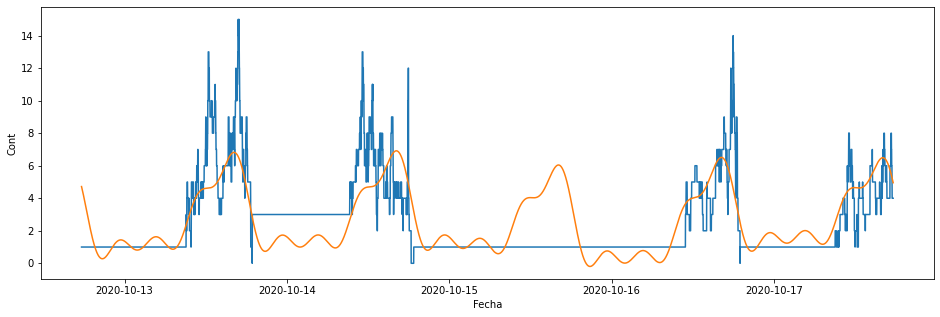

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 3.3417423356736546
RMSE Error: 1.8280433079316405
Mean: 2.821834554289196


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



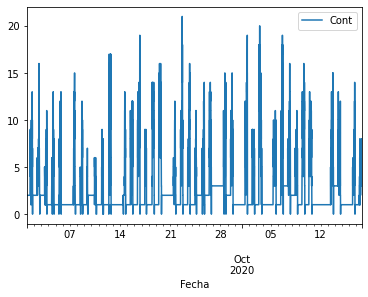

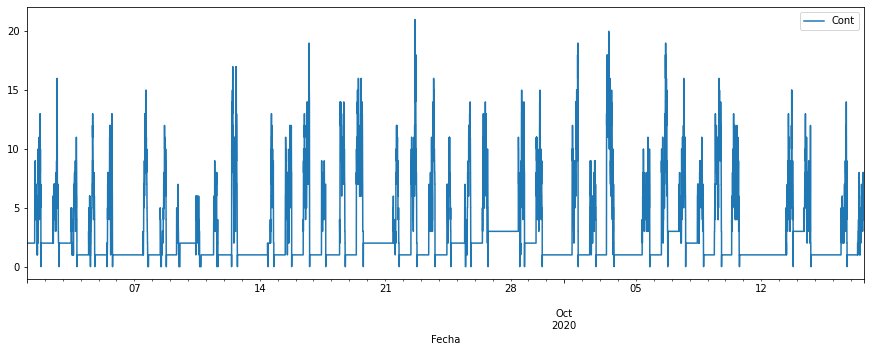

In [ ]:
from matplotlib import pyplot
plot2 = prophbas[(fechas>'2020-09-01')]
plot2 = plot2[(fechas<='2020-10-17 17:37:00')]
plot2.plot()
plot2.plot(figsize=(15,5))
pyplot.show()

In [ ]:
plot2.mean()

Cont    2.821835
dtype: float64

#Prophet base minutos 64800 mins 2 meses 

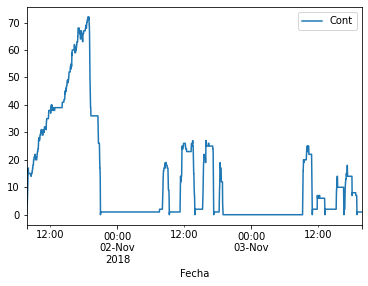

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-01-01')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
114812,2020-03-20 17:33:00,1.0
114813,2020-03-20 17:34:00,0.0
114814,2020-03-20 17:35:00,0.0
114815,2020-03-20 17:36:00,0.0
114816,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-64800]
test_data_pr = df_pr.iloc[len(df_pr)-64800:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=64800,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día del Trabajo [Labour Day],Día del Trabajo [Labour Day]_lower,Día del Trabajo [Labour Day]_upper,Independencia de Cartagena [Independence of Cartagena](Observed),Independencia de Cartagena [Independence of Cartagena](Observed)_lower,Independencia de Cartagena [Independence of Cartagena](Observed)_upper,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
114812,2020-03-20 17:33:00,11.745793,-239.604520,263.153003,-241.631085,260.824379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.399267,2.399267,2.399267,2.293722,2.293722,2.293722,0.0,0.0,0.0,0.105545,0.105545,0.105545,0.0,0.0,0.0,14.145060
114813,2020-03-20 17:34:00,11.745940,-238.798364,263.886164,-241.635486,260.832647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.382596,2.382596,2.382596,2.276679,2.276679,2.276679,0.0,0.0,0.0,0.105916,0.105916,0.105916,0.0,0.0,0.0,14.128536
114814,2020-03-20 17:35:00,11.746088,-239.227333,263.632619,-241.639886,260.840916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.365719,2.365719,2.365719,2.259431,2.259431,2.259431,0.0,0.0,0.0,0.106288,0.106288,0.106288,0.0,0.0,0.0,14.111807
114815,2020-03-20 17:36:00,11.

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-64800:]['ds'], "Pred" : prophet_pred[-64800:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-02-04 17:38:00,4.904470
2020-02-04 17:39:00,4.886689
2020-02-04 17:40:00,4.868715
2020-02-04 17:41:00,4.850553
2020-02-04 17:42:00,4.832206
...,...
2020-03-20 17:33:00,14.145060
2020-03-20 17:34:00,14.128536
2020-03-20 17:35:00,14.111807


In [ ]:
train_data = df_tst[:len(df_tst)-64800]
test_data = df_tst[len(df_tst)-64800:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



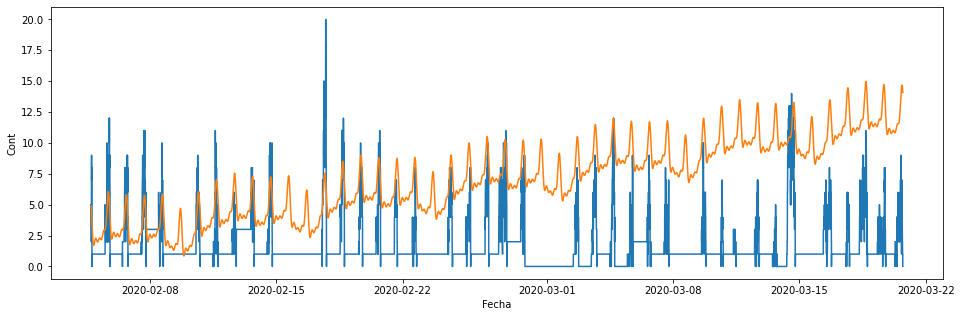

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 38.37937550051777
RMSE Error: 6.195108998275798
Mean: 1.7360582492139667


In [ ]:
#Prueba con datos nuevos

#Prophet base minutos 64800 mins 4 meses 

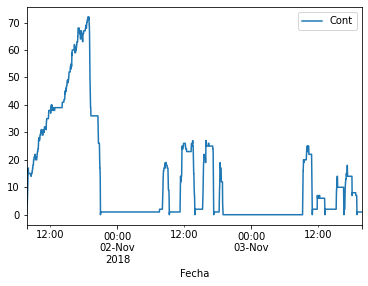

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2019-11-01')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
202652,2020-03-20 17:33:00,1.0
202653,2020-03-20 17:34:00,0.0
202654,2020-03-20 17:35:00,0.0
202655,2020-03-20 17:36:00,0.0
202656,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-64800]
test_data_pr = df_pr.iloc[len(df_pr)-64800:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=64800,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Descubrimiento de América [Discovery of America](Observed),Descubrimiento de América [Discovery of America](Observed)_lower,Descubrimiento de América [Discovery of America](Observed)_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día de los Reyes Magos [Epiphany](Observed),Día de los Reyes Magos [Epiphany](Observed)_lower,Día de los Reyes Magos [Epiphany](Observed)_upper,Día del Trabajo [Labour Day],...,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed),San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_lower,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
202652,2020-03-20 17:33:00,0.068866,-46.645870,50.973485,-49.541289,49.612748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.323415,2.323415,2.323415,2.497316,2.497316,2.497316,0.0,0.0,0.0,-0.173902,-0.173902,-0.173902,0.0,0.0,0.0,2.392281
202653,2020-03-20 17:34:00,0.068846,-47.697138,52.255972,-49.541851,49.613589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.302598,2.302598,2.302598,2.475836,2.475836,2.475836,0.0,0.0,0.0,-0.173238,-0.173238,-0.173238,0.0,0.0,0.0,2.371444
202654,2020-03-20 17:35:00,0.068826,-48.128085,51.728906,-49.542412,49.614431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-64800:]['ds'], "Pred" : prophet_pred[-64800:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-02-04 17:38:00,4.041850
2020-02-04 17:39:00,4.018842
2020-02-04 17:40:00,3.995644
2020-02-04 17:41:00,3.972257
2020-02-04 17:42:00,3.948687
...,...
2020-03-20 17:33:00,2.392281
2020-03-20 17:34:00,2.371444
2020-03-20 17:35:00,2.350398


In [ ]:
train_data = df_tst[:len(df_tst)-64800]
test_data = df_tst[len(df_tst)-64800:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



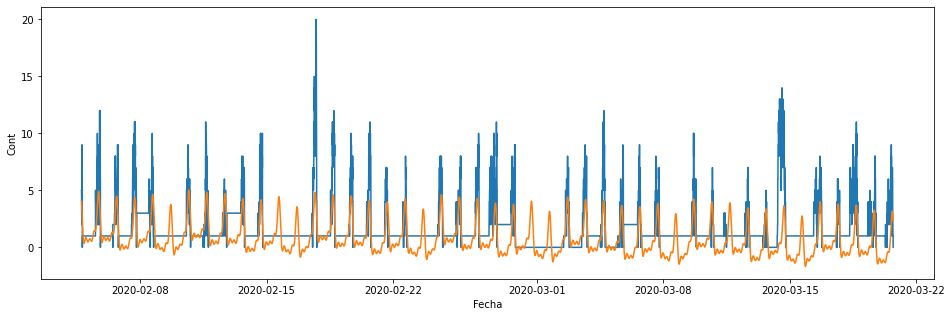

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 3.945469601694971
RMSE Error: 1.9863206190580036
Mean: 1.8371978268700315


In [ ]:
#Prueba con datos nuevos

#Prophet base minutos 64800 mins 6 meses 

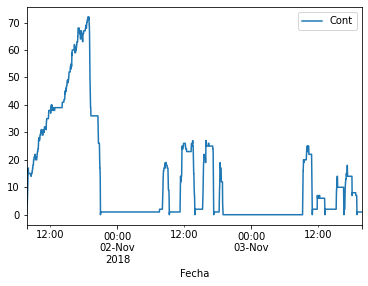

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.tail()

,Cont
Fecha,
2020-11-17 18:39:00,3.0
2020-11-17 18:40:00,3.0
2020-11-17 18:41:00,1.0
2020-11-17 18:42:00,1.0
2020-11-17 18:43:00,0.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2019-09-01')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
290492,2020-03-20 17:33:00,1.0
290493,2020-03-20 17:34:00,0.0
290494,2020-03-20 17:35:00,0.0
290495,2020-03-20 17:36:00,0.0
290496,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-64800]
test_data_pr = df_pr.iloc[len(df_pr)-64800:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
#m.add_regressor()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=64800,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Descubrimiento de América [Discovery of America](Observed),Descubrimiento de América [Discovery of America](Observed)_lower,Descubrimiento de América [Discovery of America](Observed)_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día de los Reyes Magos [Epiphany](Observed),Día de los Reyes Magos [Epiphany](Observed)_lower,Día de los Reyes Magos [Epiphany](Observed)_upper,Día del Trabajo [Labour Day],...,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed),San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_lower,San Pedro y San Pablo [Saint Peter and Saint Paul](Observed)_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
290492,2020-03-20 17:33:00,0.790942,-23.651917,29.600367,-25.155790,26.414764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.114968,2.114968,2.114968,2.172555,2.172555,2.172555,0.0,0.0,0.0,-0.057587,-0.057587,-0.057587,0.0,0.0,0.0,2.905910
290493,2020-03-20 17:34:00,0.790931,-23.397266,29.558187,-25.157844,26.415496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.096270,2.096270,2.096270,2.153294,2.153294,2.153294,0.0,0.0,0.0,-0.057024,-0.057024,-0.057024,0.0,0.0,0.0,2.887202
290494,2020-03-20 17:35:00,0.790921,-23.124774,28.684300,-25.159898,26.416228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-64800:]['ds'], "Pred" : prophet_pred[-64800:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-02-04 17:38:00,3.632416
2020-02-04 17:39:00,3.611762
2020-02-04 17:40:00,3.590944
2020-02-04 17:41:00,3.569967
2020-02-04 17:42:00,3.548832
...,...
2020-03-20 17:33:00,2.905910
2020-03-20 17:34:00,2.887202
2020-03-20 17:35:00,2.868314


In [ ]:
train_data = df_tst[:len(df_tst)-64800]
test_data = df_tst[len(df_tst)-64800:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



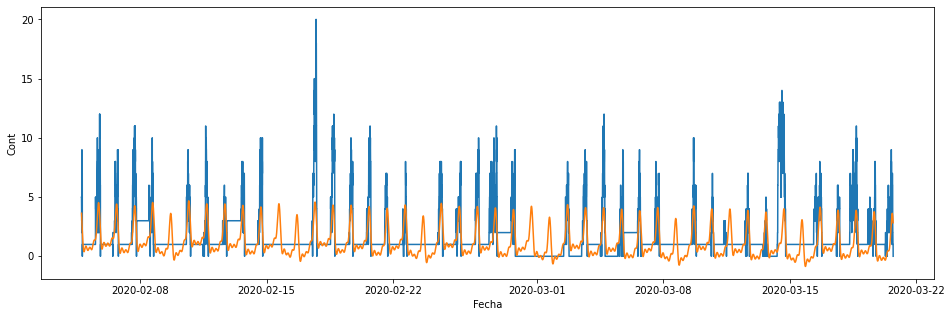

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 3.1161735189006388
RMSE Error: 1.7652686817877439
Mean: 1.775522638788008


In [ ]:
#Prueba con datos nuevos

#Prophet base minutos 5 días 7800 minutos

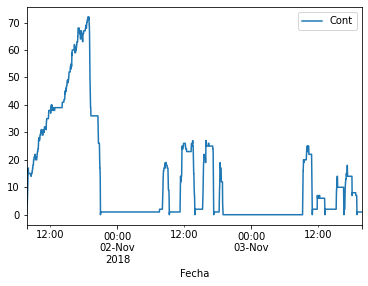

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.head()

,Cont
Fecha,
2018-11-01 07:46:00,1.0
2018-11-01 07:47:00,2.0
2018-11-01 07:48:00,2.0
2018-11-01 07:49:00,4.0
2018-11-01 07:50:00,4.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-02-01')]
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

,Fecha,Cont
418718,2020-11-17 18:39:00,3.0
418719,2020-11-17 18:40:00,3.0
418720,2020-11-17 18:41:00,1.0
418721,2020-11-17 18:42:00,1.0
418722,2020-11-17 18:43:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-7200]
test_data_pr = df_pr.iloc[len(df_pr)-7200:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=7200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7200:]['ds'], "Pred" : prophet_pred[-7200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-04-29 17:38:00,7.294731
2020-04-29 17:39:00,7.274301
2020-04-29 17:40:00,7.253741
2020-04-29 17:41:00,7.233055
2020-04-29 17:42:00,7.212246
...,...
2020-05-04 17:33:00,8.415707
2020-05-04 17:34:00,8.396006
2020-05-04 17:35:00,8.376157


In [ ]:
train_data = dtmin[:len(dtmin)-7200]
test_data = dtmin[len(dtmin)-7200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



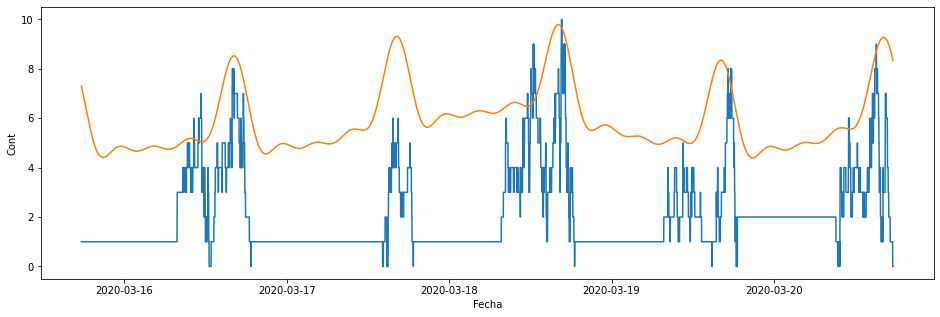

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = dtmin['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 16.830215332302146
RMSE Error: 4.102464543698354
Mean: 2.0733258953107483


#Prueba Prophet con datos nuevos, pred a sep 5 días

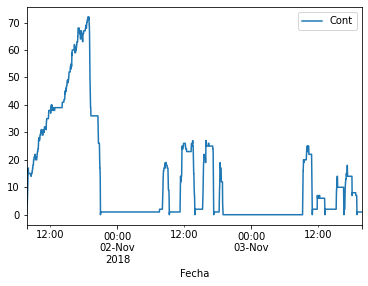

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()

In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-08-01')]
df_pr = df_pr[(fechas<='2020-9-17 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
68732,2020-09-17 17:33:00,1.0
68733,2020-09-17 17:34:00,1.0
68734,2020-09-17 17:35:00,1.0
68735,2020-09-17 17:36:00,1.0
68736,2020-09-17 17:37:00,1.0


In [ ]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-7200]
test_data_pr = df_pr.iloc[len(df_pr)-7200:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=7200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
68732,2020-09-17 17:33:00,2.619583,0.567865,7.656608,-0.198769,5.487030,1.580675,1.580675,1.580675,1.585477,1.585477,1.585477,-0.004802,-0.004802,-0.004802,0.0,0.0,0.0,4.200258
68733,2020-09-17 17:34:00,2.619615,0.602344,7.844154,-0.199532,5.487653,1.562727,1.562727,1.562727,1.567745,1.567745,1.567745,-0.005018,-0.005018,-0.005018,0.0,0.0,0.0,4.182341
68734,2020-09-17 17:35:00,2.619646,0.775420,7.601269,-0.200294,5.488277,1.544624,1.544624,1.544624,1.549859,1.549859,1.549859,-0.005235,-0.005235,-0.005235,0.0,0.0,0.0,4.164270
68735,2020-09-17 17:36:00,2.619677,0.486628,7.755608,-0.201057,5.488900,1.526370,1.526370,1.526370,1.531821,1.531821,1.531821,-0.005451,-0.005451,-0.005451,0.0,0.0,0.0,4.146048
68736,2020-09-17 17:37:00,2.619709,0.630378,8.031116,-0.201820,5.489524,1.507968,1.507968,1.507968,1.513635,1.513635,1.513635,-0.005667,-0.005667,-0.005667,0.0,0.0,0.0,4.127677


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7200:]['ds'], "Pred" : prophet_pred[-7200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-09-12 17:38:00,4.196535
2020-09-12 17:39:00,4.177522
2020-09-12 17:40:00,4.158368
2020-09-12 17:41:00,4.139076
2020-09-12 17:42:00,4.119651
...,...
2020-09-17 17:33:00,4.200258
2020-09-17 17:34:00,4.182341
2020-09-17 17:35:00,4.164270


In [ ]:
train_data = df_tst[:len(df_tst)-7200]
test_data = df_tst[len(df_tst)-7200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



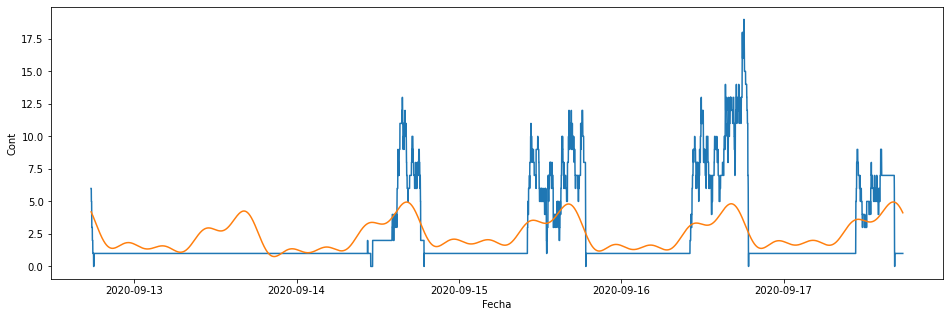

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 6.064804752944412
RMSE Error: 2.4626824303885413
Mean: 2.1900286599647933


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



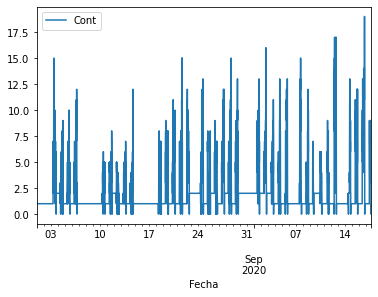

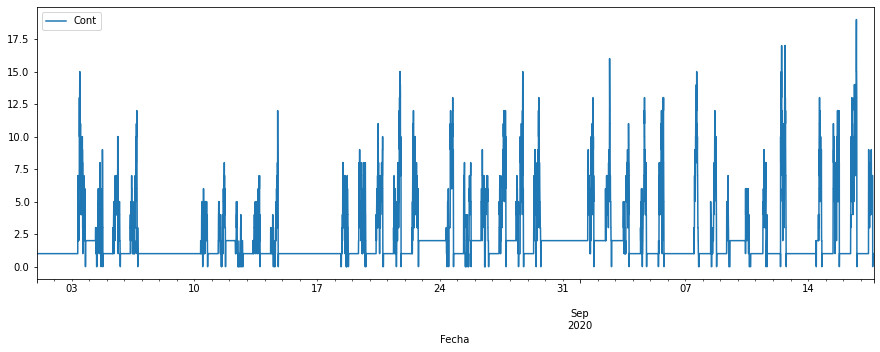

In [ ]:
from matplotlib import pyplot
plot1 = prophbas[(fechas>'2020-08-01')]
plot1 = plot1[(fechas<='2020-9-17 17:37:00')]
plot1.plot()
plot1.plot(figsize=(15,5))
pyplot.show()

In [ ]:
plot1.mean()

Cont    2.190029
dtype: float64

#Prophet base minutos largo plazo 1000 mins


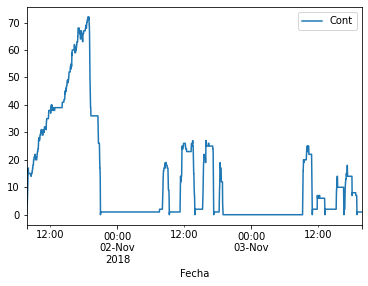

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.head()

,Cont
Fecha,
2018-11-01 07:46:00,1.0
2018-11-01 07:47:00,2.0
2018-11-01 07:48:00,2.0
2018-11-01 07:49:00,4.0
2018-11-01 07:50:00,4.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2019-09-01')]
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

,Fecha,Cont
290492,2020-03-20 17:33:00,1.0
290493,2020-03-20 17:34:00,0.0
290494,2020-03-20 17:35:00,0.0
290495,2020-03-20 17:36:00,0.0
290496,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-1200]
test_data_pr = df_pr.iloc[len(df_pr)-1200:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
290492,2020-03-20 17:33:00,1.582123,1.442465,5.795220,1.582123,1.582123,2.018703,2.018703,2.018703,1.951353,1.951353,1.951353,0.067350,0.067350,0.067350,0.0,0.0,0.0,3.600827
290493,2020-03-20 17:34:00,1.582113,1.386848,5.734755,1.582113,1.582113,1.999878,1.999878,1.999878,1.932044,1.932044,1.932044,0.067833,0.067833,0.067833,0.0,0.0,0.0,3.581991
290494,2020-03-20 17:35:00,1.582103,1.405169,5.752845,1.582103,1.582103,1.980904,1.980904,1.980904,1.912587,1.912587,1.912587,0.068317,0.068317,0.068317,0.0,0.0,0.0,3.563007
290495,2020-03-20 17:36:00,1.582092,1.085674,5.668818,1.582092,1.582092,1.961785,1.961785,1.961785,1.892984,1.892984,1.892984,0.068801,0.068801,0.068801,0.0,0.0,0.0,3.543878
290496,2020-03-20 17:37:00,1.582082,1.365017,5.684821,1.582082,1.582082,1.942525,1.942525,1.942525,1.873240,1.873240,1.873240,0.069285,0.069285,0.069285,0.0,0.0,0.0,3.524607


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-1200:]['ds'], "Pred" : prophet_pred[-1200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-19 21:38:00,0.726363
2020-03-19 21:39:00,0.730560
2020-03-19 21:40:00,0.734789
2020-03-19 21:41:00,0.739048
2020-03-19 21:42:00,0.743334
...,...
2020-03-20 17:33:00,3.600827
2020-03-20 17:34:00,3.581991
2020-03-20 17:35:00,3.563007


In [ ]:
train_data = dtmin[:len(dtmin)-1200]
test_data = dtmin[len(dtmin)-1200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



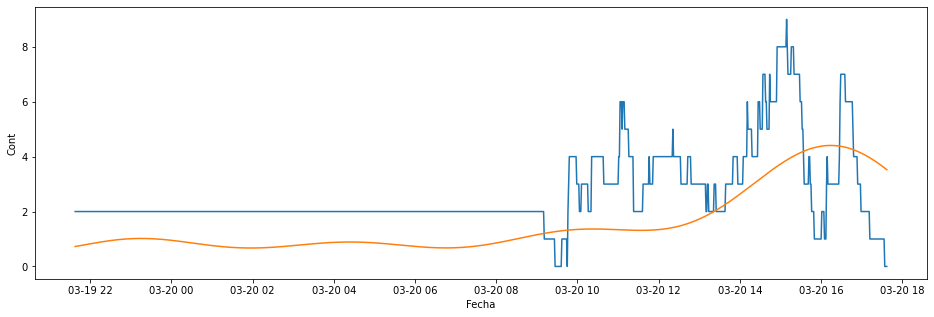

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = dtmin['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.8170931563150963
RMSE Error: 1.6784198391091236
Mean: 2.0733258953107483


#LSTM con variables exogenas

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)
import datetime as dt
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

2.3.0


In [ ]:
data_end = dt.copy()
data_end=data_end.resample('T').last().bfill()
#Incluir Dia semana
data_end['diasem']=data_end.index.to_series().dt.dayofweek
##Incluir festivos
Fest = pd.read_excel('/content/drive/My Drive/colab bases/festivosCol2018-2020.xlsx')
Fest['Festivos']=pd.to_datetime(Fest['Festivos'])
data_end['Festivo']=0
data_end['Festivo'][data_end.index.to_series().dt.date.isin(Fest['Festivos'].dt.date)]=1
data_end[data_end['Festivo']==1]
#Clima
Clima = pd.read_excel('/content/drive/My Drive/colab bases/Meteorológico.xlsx')
Clima = Clima[['Fecha','Valor']]
Clima['Fecha']=pd.to_datetime(Clima['Fecha']).dt.date
Clima.set_index('Fecha',inplace=True)
data_end['Fecha1'] = data_end.index.to_series().dt.date
data_end = data_end.join(Clima,on='Fecha1',how='left')
data_end = data_end[['Cont','diasem','Festivo','Valor']]
#hora del dia
data_end['hora'] = data_end.index.to_series().dt.hour
data_end.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora
Fecha,,,,,
2020-03-20 17:33:00,1.0,4,0,4,17
2020-03-20 17:34:00,0.0,4,0,4,17
2020-03-20 17:35:00,0.0,4,0,4,17
2020-03-20 17:36:00,0.0,4,0,4,17
2020-03-20 17:37:00,0.0,4,0,4,17


In [ ]:
#Escalar las variables para usar redes neuronales ('Datos pequeños')
maximoclima = data_end['Valor'].max()
data_end['Valor']=data_end['Valor']/maximoclima
maximoC = data_end['Cont'].max()
data_end['Cont']=data_end['Cont']/maximoC
data_end['diasem']=data_end['diasem']/7
data_end['Festivo']=data_end['Festivo']/1
data_end['hora']=data_end['hora']/24
data_end.head()

,Cont,diasem,Festivo,Valor,hora
Fecha,,,,,
2018-11-01 07:46:00,0.013889,0.428571,0.0,0.0,0.291667
2018-11-01 07:47:00,0.027778,0.428571,0.0,0.0,0.291667
2018-11-01 07:48:00,0.027778,0.428571,0.0,0.0,0.291667
2018-11-01 07:49:00,0.055556,0.428571,0.0,0.0,0.291667
2018-11-01 07:50:00,0.055556,0.428571,0.0,0.0,0.291667


In [ ]:
# Dividir multivariables en muestras
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		end_ix = i + n_steps
		if end_ix > len(sequences):
			break
		seq_x, seq_y = sequences[i:end_ix-1], sequences[end_ix-1, 0]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
data_end1 = np.array(data_end)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
##ventanas
n_steps = 18
# convertir en entrada/salida
X, y = split_sequences(data_end1, n_steps+1)
print(X.shape, y.shape)

n_features = X.shape[2]

model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True),
                      input_shape=[n_steps, n_features]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1),
])

model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X, y, epochs=300, verbose=0)

forecast = []
for time in range(len(data_end1) - n_steps):
  if time==0:
    a=data_end1[time:time + n_steps]
    b=model.predict(a[np.newaxis])
    forecast.append(model.predict(a[np.newaxis]))
  else:
    a=np.append(a[1:],np.append(b[:,0],data_end1[n_steps+time,1:])[np.newaxis],axis=0)
    b=model.predict(a[np.newaxis])
    forecast.append(model.predict(a[np.newaxis]))

a=np.array(forecast)[:,0,0]
a=pd.DataFrame(a)
a.index=pd.date_range(start=date(2019, 1, 1) + relativedelta(months = n_steps+1), end='03/1/2020', freq='min')

predicciones = pd.merge(a, pd.DataFrame(data_end.iloc[:, 0]), left_index=True, right_index=True)
predicciones

predicciones.plot()
plt.show()


(727774, 18, 5) (727774,)


#Prophet exogenas

In [ ]:
data_end = dt.copy()
data_end=data_end.resample('T').last().bfill()
#Incluir Dia semana
data_end['diasem']=data_end.index.to_series().dt.dayofweek
##Incluir festivos
Fest = pd.read_excel('/content/drive/My Drive/colab bases/festivosCol2018-2020.xlsx')
Fest['Festivos']=pd.to_datetime(Fest['Festivos'])
data_end['Festivo']=0
data_end['Festivo'][data_end.index.to_series().dt.date.isin(Fest['Festivos'].dt.date)]=1
data_end[data_end['Festivo']==1]
#Clima
Clima = pd.read_excel('/content/drive/My Drive/colab bases/Meteorológico.xlsx')
Clima = Clima[['Fecha','Valor']]
Clima['Fecha']=pd.to_datetime(Clima['Fecha']).dt.date
Clima.set_index('Fecha',inplace=True)
data_end['Fecha1'] = data_end.index.to_series().dt.date
data_end = data_end.join(Clima,on='Fecha1',how='left')
data_end = data_end[['Cont','diasem','Festivo','Valor']]
#hora del dia
data_end['hora'] = data_end.index.to_series().dt.hour
data_end.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora
Fecha,,,,,
2020-11-17 18:39:00,3.0,1,0,0,18
2020-11-17 18:40:00,3.0,1,0,0,18
2020-11-17 18:41:00,1.0,1,0,0,18
2020-11-17 18:42:00,1.0,1,0,0,18
2020-11-17 18:43:00,0.0,1,0,0,18


In [ ]:
prophbas = data_end.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-02-01')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont,diasem,Festivo,Valor,hora
70172,2020-03-20 17:33:00,1.0,4,0,4,17
70173,2020-03-20 17:34:00,0.0,4,0,4,17
70174,2020-03-20 17:35:00,0.0,4,0,4,17
70175,2020-03-20 17:36:00,0.0,4,0,4,17
70176,2020-03-20 17:37:00,0.0,4,0,4,17


In [ ]:
df_pr.columns = ['ds','y','diasem','Festivo','Valor','hora'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-1000]
test_data_pr = df_pr.iloc[len(df_pr)-1000:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
m.add_regressor('diasem')
m.add_regressor('Festivo')
m.add_regressor('Valor')
m.add_regressor('hora')
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1000,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()
#el error acá es que necesita tener un if que sea la base partida para los pronosticos este es el link donde lo hacen con un if https://towardsdatascience.com/forecast-model-tuning-with-additional-regressors-in-prophet-ffcbf1777dda

ValueError: ignored

In [ ]:
df_pr.columns = ['ds','y','diasem','Festivo','Valor','hora'] # To use prophet column names should be like that
df_pr

,ds,y,diasem,Festivo,Valor,hora
0,2020-02-01 00:01:00,1.0,5,0,0,0
1,2020-02-01 00:02:00,1.0,5,0,0,0
2,2020-02-01 00:03:00,1.0,5,0,0,0
3,2020-02-01 00:04:00,1.0,5,0,0,0
4,2020-02-01 00:05:00,1.0,5,0,0,0
...,...,...,...,...,...,...
70172,2020-03-20 17:33:00,1.0,4,0,4,17
70173,2020-03-20 17:34:00,0.0,4,0,4,17
70174,2020-03-20 17:35:00,0.0,4,0,4,17
70175,2020-03-20 17:36:00,0.0,4,0,4,17


#Prophet con festivos

In [ ]:
data_end = dt.copy()
data_end=data_end.resample('T').last().bfill()
prophbas = data_end.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-02-01')]
df_pr = df_pr[(fechas<='2020-03-20 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
70172,2020-03-20 17:33:00,1.0
70173,2020-03-20 17:34:00,0.0
70174,2020-03-20 17:35:00,0.0
70175,2020-03-20 17:36:00,0.0
70176,2020-03-20 17:37:00,0.0


In [ ]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-1000]
test_data_pr = df_pr.iloc[len(df_pr)-1000:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1000,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día del Trabajo [Labour Day],Día del Trabajo [Labour Day]_lower,Día del Trabajo [Labour Day]_upper,Independencia de Cartagena [Independence of Cartagena](Observed),Independencia de Cartagena [Independence of Cartagena](Observed)_lower,Independencia de Cartagena [Independence of Cartagena](Observed)_upper,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70172,2020-03-20 17:33:00,2.462112,3.048013,7.031186,2.344413,2.527446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.572673,2.572673,2.572673,2.160237,2.160237,2.160237,0.0,0.0,0.0,0.412437,0.412437,0.412437,0.0,0.0,0.0,5.034785
70173,2020-03-20 17:34:00,2.462184,3.141145,7.020470,2.344286,2.527661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.552811,2.552811,2.552811,2.139636,2.139636,2.139636,0.0,0.0,0.0,0.413174,0.413174,0.413174,0.0,0.0,0.0,5.014994
70174,2020-03-20 17:35:00,2.462256,3.068698,6.859001,2.344159,2.527877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.532788,2.532788,2.532788,2.118876,2.118876,2.118876,0.0,0.0,0.0,0.413912,0.413912,0.413912,0.0,0.0,0.0,4.995043
70175,2020-03-20 17:36:00,2.462327,2.952624,7.051382,2.344032,2.52809

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-1000:]['ds'], "Pred" : prophet_pred[-1000:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-20 00:58:00,1.397311
2020-03-20 00:59:00,1.395140
2020-03-20 01:00:00,1.392997
2020-03-20 01:01:00,1.390882
2020-03-20 01:02:00,1.388796
...,...
2020-03-20 17:33:00,5.034785
2020-03-20 17:34:00,5.014994
2020-03-20 17:35:00,4.995043


In [ ]:
train_data = df_tst[:len(df_tst)-1000]
test_data = df_tst[len(df_tst)-1000:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



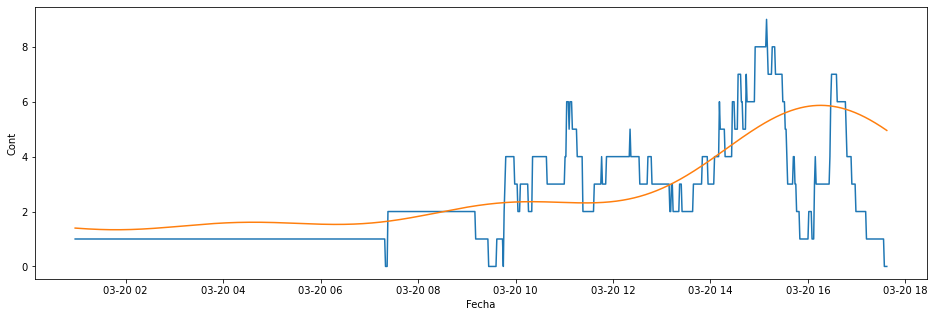

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.2764209058874476
RMSE Error: 1.5087812650902872
Mean: 1.7464411416845975


#Prueba Prophet con datos nuevos 5 días + festivos, pred a octubre 2020

---



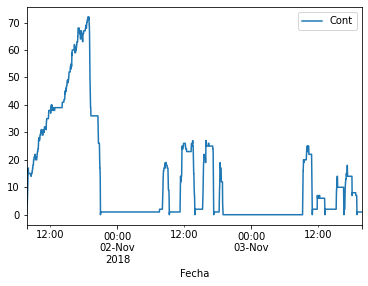

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()

In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-09-01')]
df_pr = df_pr[(fechas<='2020-10-17 17:37:00')]
df_tst = df_pr.copy()
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Fecha,Cont
67292,2020-10-17 17:33:00,4.0
67293,2020-10-17 17:34:00,4.0
67294,2020-10-17 17:35:00,4.0
67295,2020-10-17 17:36:00,4.0
67296,2020-10-17 17:37:00,4.0


In [ ]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-7200]
test_data_pr = df_pr.iloc[len(df_pr)-7200:]
from fbprophet import Prophet
m = Prophet()
m.add_country_holidays(country_name="CO")
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=7200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascensión del señor [Ascension of Jesus](Observed),Ascensión del señor [Ascension of Jesus](Observed)_lower,Ascensión del señor [Ascension of Jesus](Observed)_upper,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day]_lower,Año Nuevo [New Year's Day]_upper,Batalla de Boyacá [Battle of Boyacá],Batalla de Boyacá [Battle of Boyacá]_lower,Batalla de Boyacá [Battle of Boyacá]_upper,Corpus Christi [Corpus Christi](Observed),Corpus Christi [Corpus Christi](Observed)_lower,Corpus Christi [Corpus Christi](Observed)_upper,Descubrimiento de América [Discovery of America],Descubrimiento de América [Discovery of America]_lower,Descubrimiento de América [Discovery of America]_upper,Dia de Todos los Santos [All Saint's Day](Observed),Dia de Todos los Santos [All Saint's Day](Observed)_lower,Dia de Todos los Santos [All Saint's Day](Observed)_upper,Día de San José [Saint Joseph's Day](Observed),Día de San José [Saint Joseph's Day](Observed)_lower,Día de San José [Saint Joseph's Day](Observed)_upper,Día de la Independencia [Independence Day],Día de la Independencia [Independence Day]_lower,Día de la Independencia [Independence Day]_upper,Día de los Reyes Magos [Epiphany],Día de los Reyes Magos [Epiphany]_lower,Día de los Reyes Magos [Epiphany]_upper,Día del Trabajo [Labour Day],Día del Trabajo [Labour Day]_lower,Día del Trabajo [Labour Day]_upper,Independencia de Cartagena [Independence of Cartagena](Observed),Independencia de Cartagena [Independence of Cartagena](Observed)_lower,Independencia de Cartagena [Independence of Cartagena](Observed)_upper,Jueves Santo [Maundy Thursday],Jueves Santo [Maundy Thursday]_lower,Jueves Santo [Maundy Thursday]_upper,La Asunción [Assumption of Mary](Observed),La Asunción [Assumption of Mary](Observed)_lower,La Asunción [Assumption of Mary](Observed)_upper,La Inmaculada Concepción [Immaculate Conception],La Inmaculada Concepción [Immaculate Conception]_lower,La Inmaculada Concepción [Immaculate Conception]_upper,Navidad [Christmas],Navidad [Christmas]_lower,Navidad [Christmas]_upper,Sagrado Corazón [Sacred Heart](Observed),Sagrado Corazón [Sacred Heart](Observed)_lower,Sagrado Corazón [Sacred Heart](Observed)_upper,San Pedro y San Pablo [Saint Peter and Saint Paul],San Pedro y San Pablo [Saint Peter and Saint Paul]_lower,San Pedro y San Pablo [Saint Peter and Saint Paul]_upper,Viernes Santo [Good Friday],Viernes Santo [Good Friday]_lower,Viernes Santo [Good Friday]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67292,2020-10-17 17:33:00,2.556254,-0.967476,12.252471,-3.128376,8.825648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.209950,3.209950,3.209950,2.735840,2.735840,2.735840,0.0,0.0,0.0,0.474110,0.474110,0.474110,0.0,0.0,0.0,5.766205
67293,2020-10-17 17:34:00,2.556207,-0.620745,12.725793,-3.129069,8.826843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.178765,3.178765,3.178765,2.706473,2.706473,2.706473,0.0,0.0,0.0,0.472293,0.472293,0.472293,0.0,0.0,0.0,5.734972
67294,2020-10-17 17:35:00,2.556159,-0.559774,12.499762,-3.129762,8.828038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.147317,3.147317,3.147317,2.676844,2.676844,2.676844,0.0,0.0,0.0,0.470473,0.470473,0.470473,0.0,0.0,0.0,5.703476
67295,2020-10-17 17:36:00,2.556111,-1.047219,12.502789,-3.13

In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7200:]['ds'], "Pred" : prophet_pred[-7200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-10-12 17:38:00,4.054408
2020-10-12 17:39:00,4.025105
2020-10-12 17:40:00,3.995561
2020-10-12 17:41:00,3.965780
2020-10-12 17:42:00,3.935768
...,...
2020-10-17 17:33:00,5.766205
2020-10-17 17:34:00,5.734972
2020-10-17 17:35:00,5.703476


In [ ]:
train_data = df_tst[:len(df_tst)-7200]
test_data = df_tst[len(df_tst)-7200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



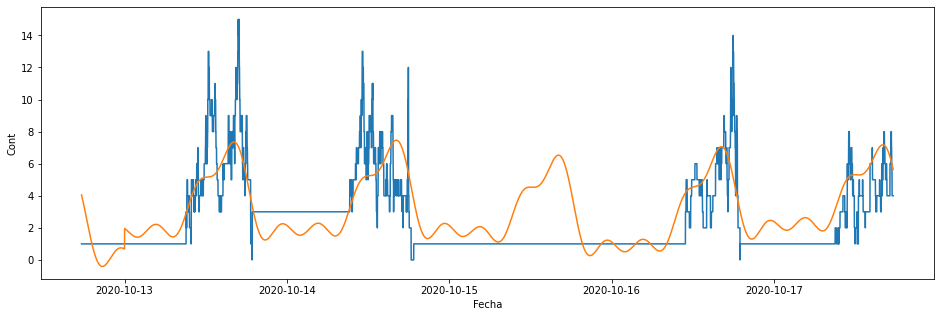

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df_tst['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 3.688297191004982
RMSE Error: 1.9204939966073786
Mean: 2.821834554289196
